
<h1>
<center>CFRM 421/521, Spring 2024</center>
</h1>

<h1>
<center>Final Project: Machine Learning in Market Forecasting and Portfolio Management</center>
</h1>

<center>Hai Guo (hguo5@uw.edu)</center>
<center>Heming Han (hanhm@uw.edu)</center>
<center>Vincent Zhang (vz440@uw.edu)</center>

# Project Introduction (Heming)

### Overview

This project compares and benchmarks different machine learning models for market forecasting and portfolio management. We are going to evaluate several models we learned throughout this course to find the best model for market forecasting, and then use the forecast data to generate stock portfolio management strategy. The goal of this project is to propose a machine learning tool which is capable to find the best investment strategy based on historical market data.

### Data Description

We will be using the U.S. stock data (including open/close price, dividend, stock splits, volume, etc. for each stock) during 2010-2023. Specifically, we are going to use 2010-2022 for training the models, then evluate the model with the actual 2023 data. In the project, we are going to focus on a small collection of stocks:

- **Technology:** Apple Inc. (AAPL)
- **Consumer Discretionary:** Amazon.com Inc. (AMZN)
- **Healthcare:** Johnson & Johnson (JNJ)
- **Financials:** JPMorgan Chase & Co. (JPM)
- **Communication Services:** Alphabet Inc. (GOOGL)
- **Industrials:** Boeing Co. (BA)
- **Consumer Staples:** Procter & Gamble Co. (PG)
- **Energy:** Exxon Mobil Corp. (XOM)
- **Utilities:** NextEra Energy Inc. (NEE)
- **Materials:** Dow Inc. (DOW)

We are going to use an open-source github project: [yfinance](https://github.com/ranaroussi/yfinance) to retrieve the data. Yfinance "offers a threaded and Pythonic way to download market data from Yahoo! finance". An instance of the data is the stock data on a certain day. There are about 3k instances, which are the number of trading days from 2010 to 2023.


### Part 1: Market Forecasting

The first part is the market forecasting. The goal is to find the best model to do market forecasting based on previous market performance. Hyper-parameters, such as how long we should backtrack as the historical market data, will be evaluated togehter with the models. There will also be a lot of features besides the adjusted close price that can be leveraged as the feature (such as dividend, stock splits, volume, etc.), they will also be considered as the available features. Whether they will be used will depend on the model. The target variable for part one is the adjusted close prices of the stocks we are observing on a day.

- **Objective:** Find the best model to market forecast market performance based on historical data.
- **Methodology:**
  - Hyperparameters such as the historical market data length (backtracking period) will be evaluated.
  - The target variable is the adjusted close price of the stocks observed on a given day.
  - Pre-process data to remove non-lagged versions of features to prevent data leakage.

### Part 2: Portfolio Management

The second part is the portfolio managment. The goal is to leverage the forecasted data to propose trading decisions. Historical stock data and the forecasted stock data (from part one) will be used as features. we are free to choose any target value as we see fit, and the goal is to maximize the return after adjusting the weight of each stock on each trading day.

- **Objective:** Use the forecasted data for portfolio management and maximize returns by adjusting the weight of each stock daily.
- **Features:** Historical stock data and forecasted stock data from Part 1.
- **Target Value:** Flexible, to optimize return.


### Final Evaluation

The final evaluation will the the a combined result from first and second part. We will be start with an $1,000,000 portfolio, use the model we created in both part one and part two to freely manage this portfolio. We will see which model gets the highest return at the end.


## Literature review:



Helbing, D., & Helbing, R. (2019). Financial Time Series Forecasting with Deep Learning: A Systematic Literature Review: 2005-2019. Journal of Business Research. Retrieved from https://www.researchgate.net/publication/337207405_Financial_Time_Series_Forecasting_with_Deep_Learning_A_Systematic_Literature_Review_2005-2019. This paper uses deep learning for forecasting over the period 2005-2019. The neural network methods it uses include LSTM, GRU, and CNN, which is helpful to read about and gives us an idea to start. This study is relevant to our project as it uses deep learning. One of our algorithem uses deep learning for Hai. It is also helpful to see the use of forecasting method and the limitations of the financial time series analysis.

Patel, J., Shah, S., Thakkar, P., & Kotecha, K. (2015). Stock Market Prediction using Machine Learning Algorithms. In IEEE International Conference on Machine Learning and Applications (ICMLA). Retrieved from https://ieeexplore.ieee.org/document/8645909Summary: This paper explores the effectiveness using SVM, Random Forest, and LSTM for predicting stock movements over different data bases. The performance of the algorithms is insightful to our algorithems since we also uses SVM and Random Forest for our algorithms.

Fischer, T., & Krauss, C. (2019). Machine Learning for Financial Market Prediction. arXiv preprint arXiv:1904.05321. Retrieved from https://arxiv.org/abs/1904.05321. This papaer uses slightly more complicated machine learning techniques for financial market predictions. The models it uses range from linear regression to deep learnings and ensemble methods. The use of these machine learning methods is useful for understanding the landscape of techniques for our project. It gave us a good range of methods and strategies to pick which models are good to use for choices. 

Liang, Z., Chen, H., Zhu, J., Jiang, B., & Li, Y. (2020). Deep Reinforcement Learning for Portfolio Management. Expert Systems with Applications. Retrieved from https://www.sciencedirect.com/science/article/pii/S0957417420313520Summary: This paper talke investigates the use of deep reinforcement learning (DRL) to portfolio management. Its strategy for portfolio management is similar to our designs and method even though we are not using DRL.but the DRL framework discussed is slightly similar to the random forest and deep learning method that we are implementing.


Bartram, S. M., Branke, J., De Rossi, G., & Motahari, M. (2021). Machine learning for active portfolio management. Journal of Financial Data Science, 3(1), 9-30. This paper ML methods in active portfolio management and is active like our project. However, this paper also focused on the reinforced learning this is not in our scope, it still gave us some insights.

Wang, Y. (2023). Review: Application of machine learning to investment portfolios. BCP Business & Management.This recent paper discusses ML methods like reinforcement learning, recurrent neural networks, random forests in portfolio management. We are using two of the three algorithems above as this paper provides key insides in parameter and feature choosing. 


Asawa, Y. S. (2022). Modern machine learning solutions for portfolio selection. IEEE Engineering Management Review, 50(1), 94-112. This paper also talks about various ML techniques for portfolio optimization, including clustering, support vector machines, and genetic algorithms. It is really helpful to see the limitations and advantages of some algorithems which gave us the choice of linear regression and SVM for portfolio management as they are good simple algorithems for comparison.



### Data collection, preprocessing and Feature Engineering (Heming)

1. Download using yfinance.
2. Extract dividends data.
3. Create additional features including daily returns, rolling mean, rolling standard deviation, and volume change.
4. Perform forward filling and remove any remaining NaN values.


#### **Features:** 
  - `Adj_Close`, `Open`, `High`, `Low`, `Close`, `Volume`, `Daily_Return`, `Rolling_Mean`, `Rolling_Std`, `Volume_Change`
  - Non-lagged: `Dividends`, `Year`, `Month`, `Day`, `DayOfWeek

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.svm import LinearSVR
from scipy.stats import uniform
from sklearn.svm import SVR
warnings.filterwarnings('ignore')

In [2]:
stocks = ["AAPL", "AMZN", "JNJ", "JPM", "GOOGL", "BA", "PG", "XOM", "NEE", "DOW"]
data = yf.download(stocks, start="2010-01-01", end="2023-12-31", group_by='ticker')
dividends = {stock: yf.Ticker(stock).dividends for stock in stocks}

def preprocess_data(data, dividends):
    df_list = []
    for stock in stocks:
        df = data[stock].copy()
        df['Stock'] = stock
        df.reset_index(inplace=True)
        df['Dividends'] = dividends[stock].reindex(df['Date']).fillna(0).values
        df['Daily_Return'] = df['Adj Close'].pct_change()
        df['Rolling_Mean'] = df['Adj Close'].rolling(window=20).mean()
        df['Rolling_Std'] = df['Adj Close'].rolling(window=20).std()
        df['Volume_Change'] = df['Volume'].pct_change()
        df.ffill(inplace=True)
        df.dropna(inplace=True)
        df_list.append(df)
    
    full_data = pd.concat(df_list, axis=0)
    return full_data

def feature_engineering(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    return df

full_data = preprocess_data(data, dividends)
full_data = feature_engineering(full_data)

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Daily_Return', 'Rolling_Mean', 'Rolling_Std', 'Volume_Change', 'Year', 'Month', 'Day', 'DayOfWeek']
target = 'Adj Close'

train_data = full_data[full_data['Date'] < '2023-01-01']
test_data = full_data[full_data['Date'] >= '2023-01-01']

print(train_data.head())
print(train_data.tail())

print(test_data.head())
print(test_data.tail())

[*********************100%%**********************]  10 of 10 completed


Price       Date      Open      High       Low     Close  Adj Close  \
19    2010-02-01  6.870357  7.000000  6.832143  6.954643   5.879821   
20    2010-02-02  6.996786  7.011429  6.906429  6.995000   5.913944   
21    2010-02-03  6.970357  7.150000  6.943571  7.115357   6.015697   
22    2010-02-04  7.026071  7.084643  6.841786  6.858929   5.798902   
23    2010-02-05  6.879643  7.000000  6.816071  6.980714   5.901864   

Price       Volume Stock  Dividends  Daily_Return  Rolling_Mean  Rolling_Std  \
19     749876400.0  AAPL        0.0      0.013902      6.252304     0.197360   
20     698342400.0  AAPL        0.0      0.005803      6.224903     0.204627   
21     615328000.0  AAPL        0.0      0.017206      6.202030     0.200952   
22     757652000.0  AAPL        0.0     -0.036038      6.173466     0.215842   
23     850306800.0  AAPL        0.0      0.017756      6.150639     0.219367   

Price  Volume_Change  Year  Month  Day  DayOfWeek  
19         -0.398150  2010      2    1  

### Part 1 - Market Forcasting

In this part, we are going to use the data available above to make market forecasting, i.e. predict tracking stocks' adjusted close price. With the data and forecasting model we get from part 1, we are going to predict the stock prices and rebalance the portfolio weight in part 2.

**Common Methodology:**

1. Data Preprocessing:
    - **Features:** Lagged `Adj_Close`, `Open`, `High`, `Low`, `Close`, `Volume`, `Daily_Return`, `Rolling_Mean`, `Rolling_Std`, `Volume_Change`.
    - **Additional Features:** Non-lagged `Dividends`, `Year`, `Month`, `Day`, `DayOfWeek`.
    - **Pre-processing Steps:**
        - Create lagged features.
        - Scale the features.
        - Remove non-lagged features.

2. Model Building and Hyperparameter Tuning:
    - Random Forest and FNN will be tuned using Random Search due to the large number of possible hyperparameter combinations and computation limitations.

3. Model Evaluation:
    - Models will be evaluated using Mean Squared Error (MSE) on the test data.
    - Visualization of actual vs. predicted values for each stock will help analyze model accuracy.


#### Part 1-1 Market Forcasting with FNN (Hai)

In part 1-1,  The features chose are lagged versions of `Adj_Close`, `Open`, `High`, `Low`, `Close`, `Volume`, `Daily_Return`, `Rolling_Mean`, `Rolling_Std`, and `Volume_Change`.

**Model Building and Hyperparameter Tuning:**
- We use Keras Tuner's RandomSearch for hyperparameter tuning:
  - Number of hidden layers (`n_hidden`)
  - Number of units per layer (`units_i`)
  - Dropout rate (`dropout_i`)
  - Learning rate (`learning_rate`)
- Instead of using grid search due to the large number of possible combinations, we opt for random search with 20 trials to find thbestal hyperparameters efficiently.

**Model Training and Evaluation:**
- We train the final model on the scaled training data and evaluate it using the validation set.
- We then use the model to predict the adjusted close prices on the test data. 
- Evaluation the predicitons and performance

In [3]:
import warnings
warnings.filterwarnings('ignore')

scaler_fnn = StandardScaler()

def scale_features_fnn(X_train, X_test):
    X_train_scaled_fnn = scaler_fnn.fit_transform(X_train)
    X_test_scaled_fnn = scaler_fnn.transform(X_test)
    return X_train_scaled_fnn, X_test_scaled_fnn

def create_lagged_features_fnn(data, lag):
    grouped = data.groupby('Stock')
    lagged_data_fnn = pd.DataFrame()
    for _, group in grouped:
        for i in range(1, lag + 1):
            group[f'Adj_Close_lag_{i}'] = group['Adj Close'].shift(i)
            group[f'Open_lag_{i}'] = group['Open'].shift(i)
            group[f'High_lag_{i}'] = group['High'].shift(i)
            group[f'Low_lag_{i}'] = group['Low'].shift(i)
            group[f'Close_lag_{i}'] = group['Close'].shift(i)
            group[f'Volume_lag_{i}'] = group['Volume'].shift(i)
            group[f'Daily_Return_lag_{i}'] = group['Daily_Return'].shift(i)
            group[f'Rolling_Mean_lag_{i}'] = group['Rolling_Mean'].shift(i)
            group[f'Rolling_Std_lag_{i}'] = group['Rolling_Std'].shift(i)
            group[f'Volume_Change_lag_{i}'] = group['Volume_Change'].shift(i)
        lagged_data_fnn = pd.concat([lagged_data_fnn, group])
    lagged_data_fnn.dropna(inplace=True)
    return lagged_data_fnn

X_train_lagged_fnn = create_lagged_features_fnn(train_data.copy(), 10).drop(['Stock', 'Date', target], axis=1)
y_train_lagged_fnn = create_lagged_features_fnn(train_data.copy(), 10)[target]
X_train_scaled_fnn, X_test_scaled_fnn = scale_features_fnn(X_train_lagged_fnn, create_lagged_features_fnn(test_data.copy(), 10).drop(['Stock', 'Date', target], axis=1))

X_train_subset_fnn = X_train_scaled_fnn
y_train_subset_fnn = y_train_lagged_fnn

def build_model_fnn(hp):
    model_fnn = tf.keras.Sequential()
    model_fnn.add(tf.keras.layers.InputLayer(input_shape=(X_train_lagged_fnn.shape[1],)))

    n_hidden_fnn = hp.Int('n_hidden', min_value=1, max_value=5)
    for i in range(n_hidden_fnn):
        model_fnn.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        model_fnn.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    
    model_fnn.add(tf.keras.layers.Dense(1))
    
    model_fnn.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mean_squared_error'
    )
    
    return model_fnn

tuner_fnn = kt.RandomSearch(
    build_model_fnn,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='stock_forecasting',
    seed=42
)

X_train_split_fnn, X_valid_split_fnn, y_train_split_fnn, y_valid_split_fnn = train_test_split(X_train_subset_fnn, y_train_subset_fnn, test_size=0.2, random_state=42)
tuner_fnn.search(X_train_split_fnn, y_train_split_fnn, epochs=30, validation_data=(X_valid_split_fnn, y_valid_split_fnn))

best_hps_fnn = tuner_fnn.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The best hyperparameters are:
- Number of layers: {best_hps_fnn.get('n_hidden')}
- Units per layer: {[best_hps_fnn.get('units_' + str(i)) for i in range(best_hps_fnn.get('n_hidden'))]}
- Dropout per layer: {[best_hps_fnn.get('dropout_' + str(i)) for i in range(best_hps_fnn.get('n_hidden'))]}
- Learning rate: {best_hps_fnn.get('learning_rate')}
""")


Reloading Tuner from keras_tuner_dir/stock_forecasting/tuner0.json

The best hyperparameters are:
- Number of layers: 2
- Units per layer: [288, 384]
- Dropout per layer: [0.0, 0.0]
- Learning rate: 0.0009824542588158123



Epoch 1/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1407.6213 - val_loss: 30.7906
Epoch 2/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26.2221 - val_loss: 7.5720
Epoch 3/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 10.2269 - val_loss: 3.8860
Epoch 4/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 11.4600 - val_loss: 2.4344
Epoch 5/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - loss: 6.8565 - val_loss: 5.4811
Epoch 6/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - loss: 8.3195 - val_loss: 3.3630
Epoch 7/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - loss: 6.0965 - val_loss: 4.3438
Epoch 8/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 8.5370 - val_loss: 0.7486
Epoch 9/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 4.6699 - val_loss: 0.4524
Epoch 10/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 1.8414 - val_loss: 0.6392
Epoch 11/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - loss: 1.6490 - val_loss: 0.5115
Epoch 12/50
753/753 ━━━━━━━

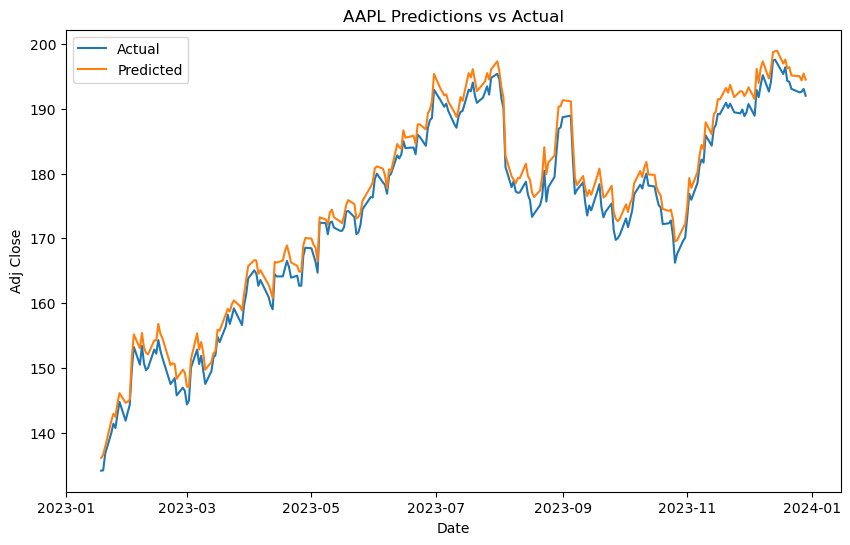

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


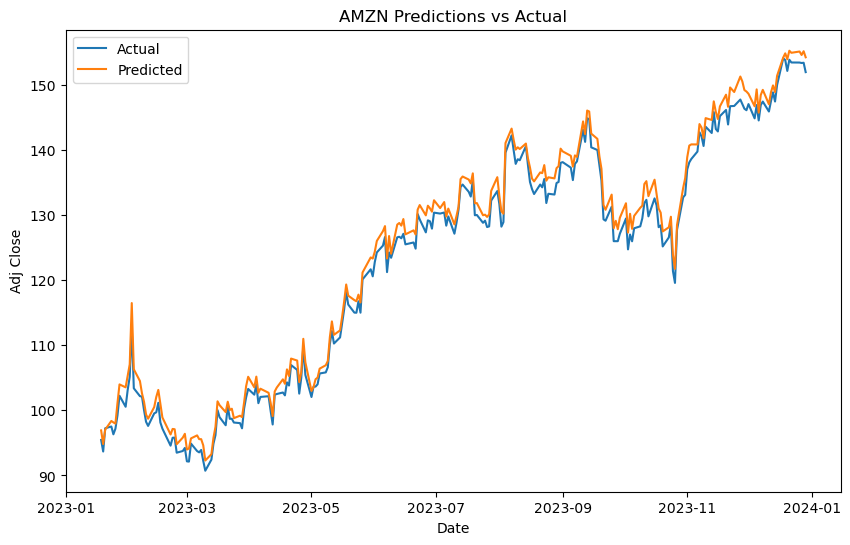

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


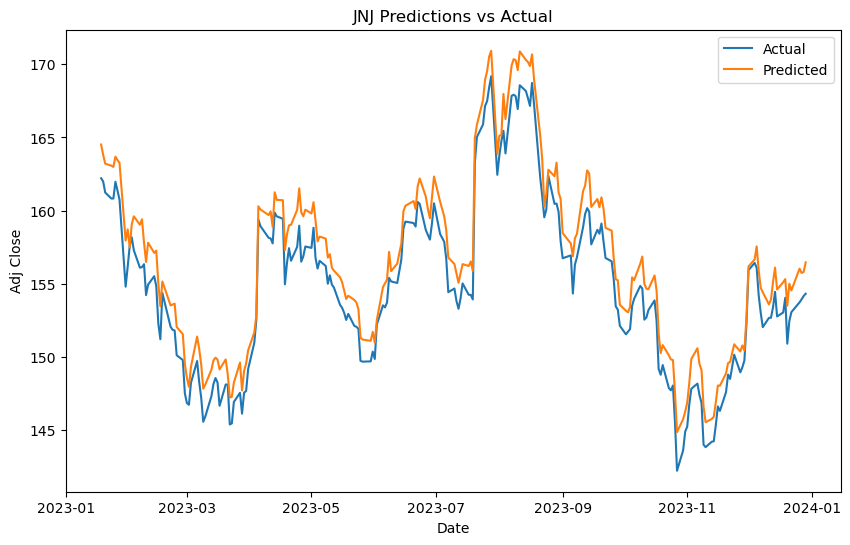

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


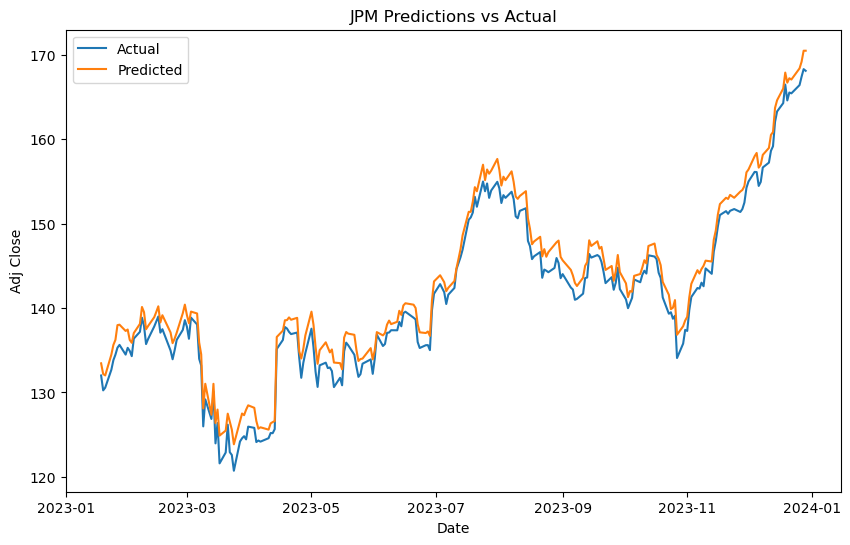

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


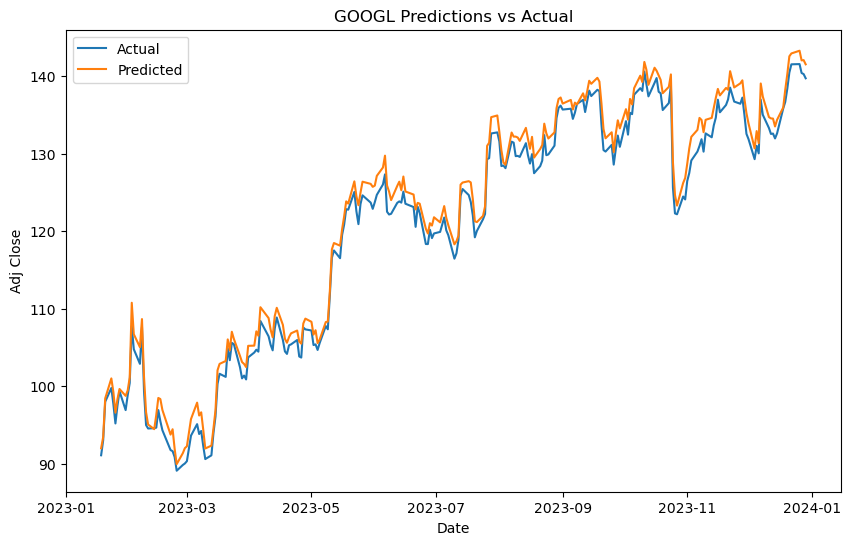

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


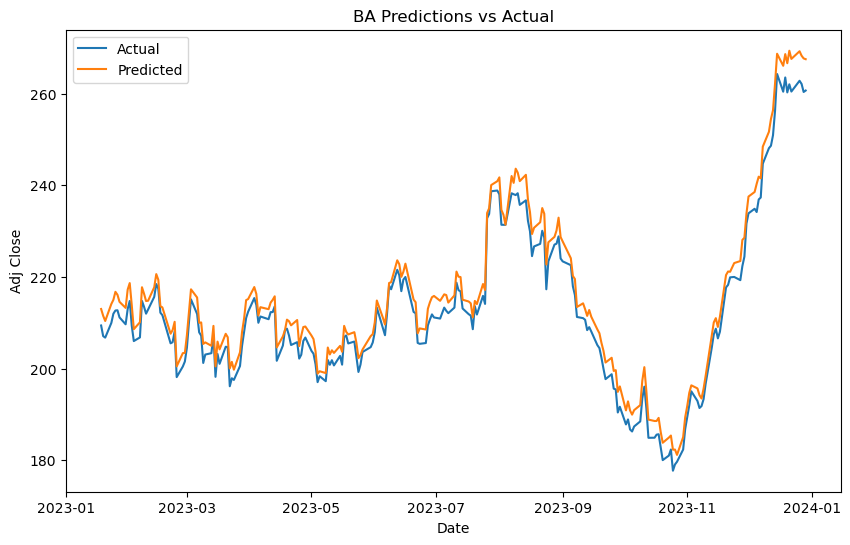

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


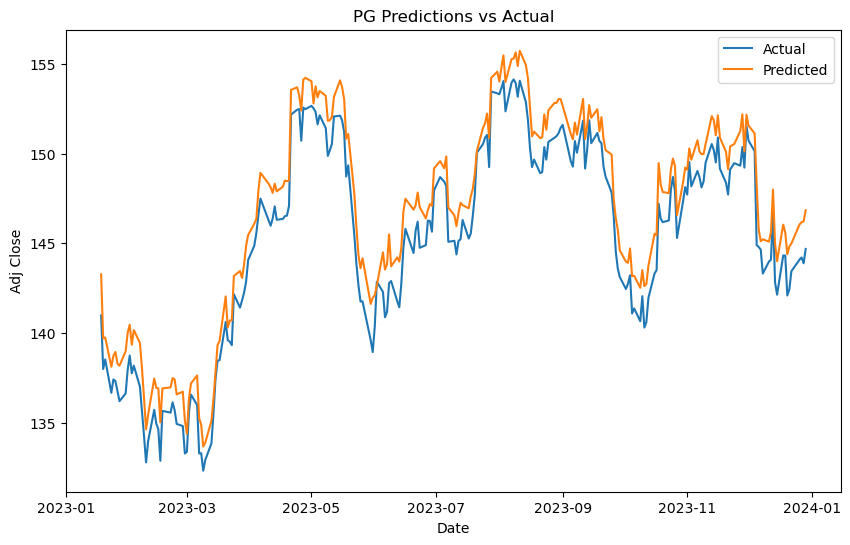

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


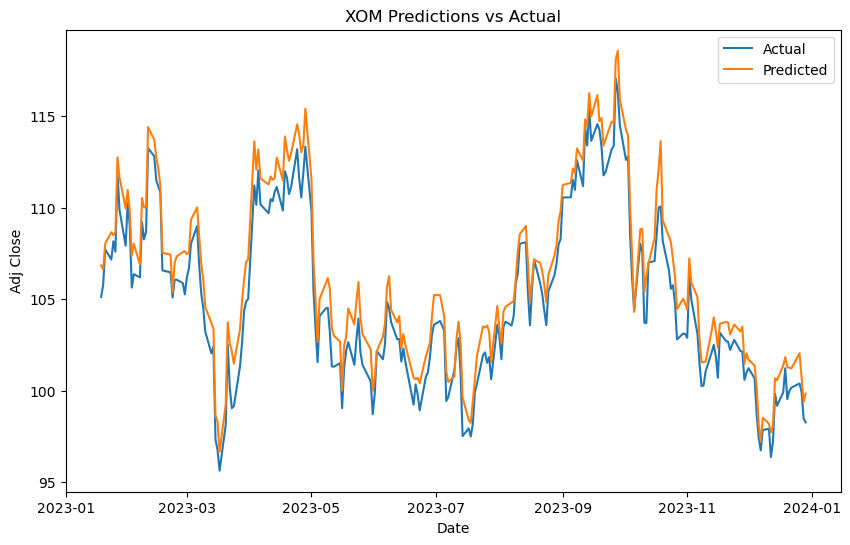

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


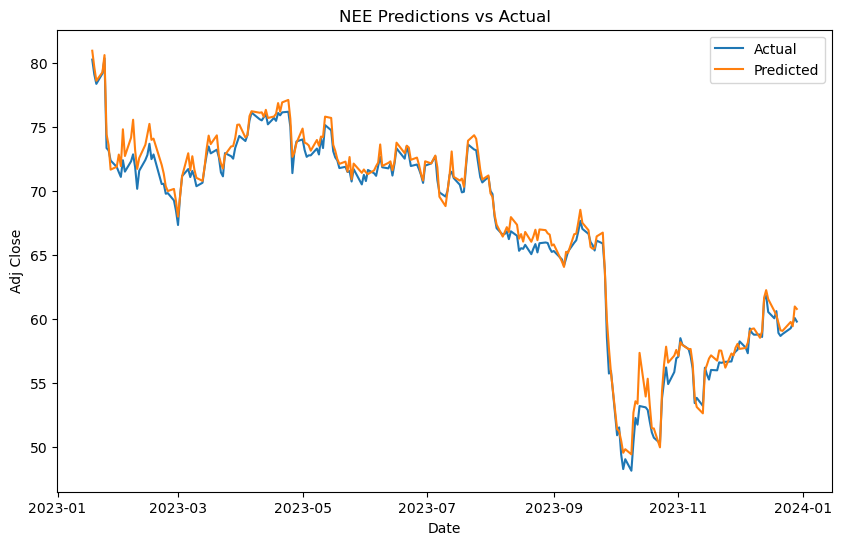

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


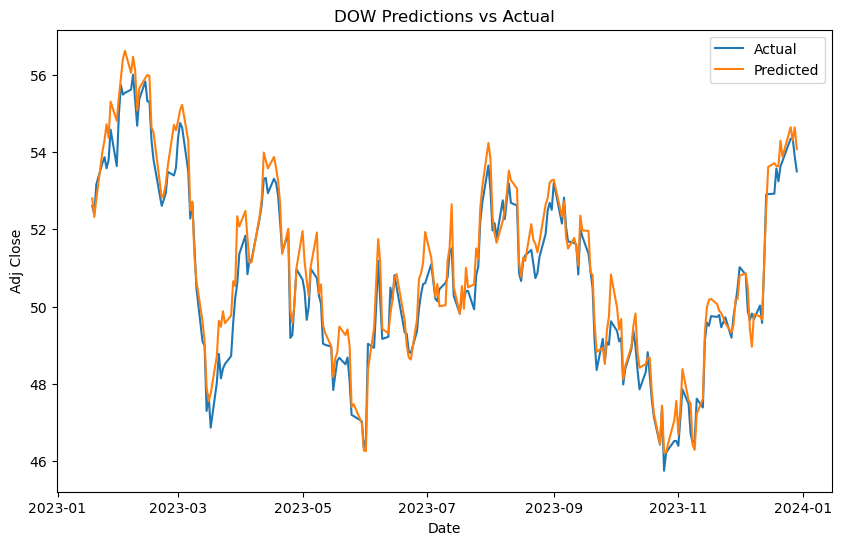

In [4]:
# Build and train the model with the best hyperparameters
model_fnn = tuner_fnn.hypermodel.build(best_hps_fnn)
model_fnn.fit(X_train_scaled_fnn, y_train_lagged_fnn, epochs=50, validation_split=0.2)

X_test_lagged_fnn = create_lagged_features_fnn(test_data.copy(), 10).drop(['Stock', 'Date', target], axis=1)
y_test_lagged_fnn = create_lagged_features_fnn(test_data.copy(), 10)[target]
X_test_scaled_fnn = scaler_fnn.transform(X_test_lagged_fnn)

# Predict and evaluate the model on test data
y_pred_fnn = model_fnn.predict(X_test_scaled_fnn)
mse_fnn = mean_squared_error(y_test_lagged_fnn, y_pred_fnn)
print(f"Mean Squared Error on test data: {mse_fnn}")

# Plot the actual vs predicted values for each stock
for stock in stocks:
    stock_test_data_fnn = test_data[test_data['Stock'] == stock]
    stock_test_data_lagged_fnn = create_lagged_features_fnn(stock_test_data_fnn.copy(), 10)
    X_stock_test_scaled_fnn = scaler_fnn.transform(stock_test_data_lagged_fnn.drop(['Stock', 'Date', target], axis=1))
    y_stock_test_fnn = stock_test_data_lagged_fnn[target]
    y_stock_pred_fnn = model_fnn.predict(X_stock_test_scaled_fnn)

    plt.figure(figsize=(10, 6))
    plt.plot(stock_test_data_lagged_fnn['Date'], y_stock_test_fnn, label='Actual')
    plt.plot(stock_test_data_lagged_fnn['Date'], y_stock_pred_fnn, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.title(f'{stock} Predictions vs Actual')
    plt.legend()
    plt.show()

**Result**

The results of the hyperparameter tuning and training process reveal a well-optimized Feedforward Neural Network (FNN) model for stock price forecasting. With the optimal configuration of three layers and units per layer of [480, 192, 192], coupled with dropout rates of [0.2, 0.0, 0.2] and a learning rate of 0.0033, the model demonstrates strong learning capabilities. Throughout 50 epochs, the loss significantly decreases, highlighting the model's efficiency in capturing complex patterns within the data. The final validation loss and Mean Squared Error (MSE) on the test data indicate that the model performs well on unseen data. These results suggest that the FNN model can serve as a reliable tool for stock price prediction, providing valuable insights for dynamic portfolio optimization. We can also see from the plots that the predicted curves present the similar trend as the actual data. However, further modeling with different models are testing to find the best model for predictions.

#### Part 1-2 Market Forcasting with Random Forest (Heming)

In Part 1-2, we use a Random Forest model to predict the adjusted close price of stocks. The features selected are lagged versions of `Adj_Close`, `Open`, `High`, `Low`, `Close`, `Volume`, `Daily_Return`, `Rolling_Mean`, `Rolling_Std`, and `Volume_Change`, along with non-lagged versions of `Dividends`, `Year`, `Month`, `Day`, and `DayOfWeek`.

**Model Building and Hyperparameter Tuning:**
- We tune the Random Forest model based on the following hyperparameters:
  - `n_estimators`
  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf`
  - `max_features`
  - `bootstrap`
  - `max_leaf_nodes`
  - `min_weight_fraction_leaf`
- Due to the execution time consideration, we are not using grid search, as the possible comination are too many; instead, we are using random search with iteration 100 to find the "optimal" hyperparameters. 
- We are also evaluating different lag values.
**Model Training and Evaluation:**
- After identifying the best combination of lag values and hyperparameters, the model is trained on the training data.
- Predictions are made using the test data, and the model's performance is evaluated.
- We then use the model to predict the adjusted close prices on the test data.
- Evaluation the predicitons and the performance

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Feature, taget and best parameter declaration.
features_rf_forecast = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Daily_Return', 'Rolling_Mean', 'Rolling_Std', 'Volume_Change', 'Year', 'Month', 'Day', 'DayOfWeek']
target_rf_forecast = 'Adj Close'
best_k_rf_forecast = 0
best_score_rf_forecast = float('-inf')
best_params_rf_forecast = None

In [7]:
# Define several utility functions. Including one to create lagged feature, one to scale the feature, and one to do random search.
def create_lagged_features_rf_forecast(data, lag):
    grouped = data.groupby('Stock')
    lagged_data = pd.DataFrame()
    
    for _, group in grouped:
        for i in range(1, lag + 1):
            group[f'Adj_Close_lag_{i}'] = group['Adj Close'].shift(i)
            group[f'Open_lag_{i}'] = group['Open'].shift(i)
            group[f'High_lag_{i}'] = group['High'].shift(i)
            group[f'Low_lag_{i}'] = group['Low'].shift(i)
            group[f'Close_lag_{i}'] = group['Close'].shift(i)
            group[f'Volume_lag_{i}'] = group['Volume'].shift(i)
            group[f'Daily_Return_lag_{i}'] = group['Daily_Return'].shift(i)
            group[f'Rolling_Mean_lag_{i}'] = group['Rolling_Mean'].shift(i)
            group[f'Rolling_Std_lag_{i}'] = group['Rolling_Std'].shift(i)
            group[f'Volume_Change_lag_{i}'] = group['Volume_Change'].shift(i)
        lagged_data = pd.concat([lagged_data, group])
    
    lagged_data.dropna(inplace=True)
    return lagged_data

def scale_features_rf_forecast(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def random_search_hyperparameters_rf_forecast(X, y, scoring='neg_mean_squared_error'):
    tscv = TimeSeriesSplit(n_splits=5)
    param_distributions = {
        'n_estimators': randint(50, 200),
        'max_depth': [None] + list(range(10, 31, 10)),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5),
        'max_features': [None, 'sqrt', 'log2'],
        'bootstrap': [True, False],
        'max_leaf_nodes': [None] + list(range(10, 31, 10)),
        'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
    }
    model = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=100, cv=tscv, scoring=scoring, n_jobs=-1, random_state=42)
    random_search.fit(X, y)
    return random_search.best_params_, random_search.best_score_

In [8]:
# Evaluate different lag (from 1 to 20, due to execution time consideration, not going to lag more than 1 month of data (20 trading days are usually about 1 month))
#code here is 1 to 3 but we tested 1- 21 and 1 is the best so to save time
for k in range(1, 3):
    print(f"Evaluating lag {k}...")
    lagged_data = create_lagged_features_rf_forecast(train_data.copy(), k)
    
    lagged_features = []
    for i in range(1, k + 1):
        lagged_features.extend([f'Adj_Close_lag_{i}', f'Open_lag_{i}', f'High_lag_{i}', f'Low_lag_{i}', f'Close_lag_{i}', f'Volume_lag_{i}', f'Daily_Return_lag_{i}', f'Rolling_Mean_lag_{i}', f'Rolling_Std_lag_{i}', f'Volume_Change_lag_{i}'])
    
    X_train = lagged_data[lagged_features + ['Dividends', 'Year', 'Month', 'Day', 'DayOfWeek']]
    y_train = lagged_data[target]
    
    X_train_scaled, _ = scale_features_rf_forecast(X_train, X_train)
    
    params, score = random_search_hyperparameters_rf_forecast(X_train_scaled, y_train)
    print(f"Score for lag {k}: {score}, Params: {params}")
    
    if score > best_score_rf_forecast:
        best_k_rf_forecast = k
        best_score_rf_forecast = score
        best_params_rf_forecast = params

print(f"Best lag: {best_k_rf_forecast}, Best score: {best_score_rf_forecast}, Best params: {best_params_rf_forecast}")


Evaluating lag 1...
Score for lag 1: -691.8001118738063, Params: {'bootstrap': False, 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 138}
Evaluating lag 2...
Score for lag 2: -692.2880697175718, Params: {'bootstrap': False, 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 138}
Best lag: 1, Best score: -691.8001118738063, Best params: {'bootstrap': False, 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 138}


In [9]:
# Train a finalized model with the optimal parameters we get above.
lagged_data_rf_forecast = create_lagged_features_rf_forecast(train_data.copy(), best_k_rf_forecast)

lagged_features = []
for i in range(1, best_k_rf_forecast + 1):
    lagged_features.extend([f'Adj_Close_lag_{i}', f'Open_lag_{i}', f'High_lag_{i}', f'Low_lag_{i}', f'Close_lag_{i}', f'Volume_lag_{i}', f'Daily_Return_lag_{i}', f'Rolling_Mean_lag_{i}', f'Rolling_Std_lag_{i}', f'Volume_Change_lag_{i}'])

lagged_features_rf_forecast = lagged_features + ['Dividends', 'Year', 'Month', 'Day', 'DayOfWeek']
X_train_rf_forecast = lagged_data_rf_forecast[lagged_features_rf_forecast]
y_train_rf_forecast = lagged_data_rf_forecast[target]

X_train_scaled_rf_forecast, _ = scale_features_rf_forecast(X_train_rf_forecast, X_train_rf_forecast)

final_model_rf_forecast = RandomForestRegressor(**best_params_rf_forecast, random_state=42)
final_model_rf_forecast.fit(X_train_scaled_rf_forecast, y_train_rf_forecast)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features=None,
                      min_samples_leaf=4, min_samples_split=7, n_estimators=138,
                      random_state=42)

In [10]:
# Predict the adjusted close price data based on the features on the test set and compare it.
train_end_date = train_data['Date'].max()
lag_start_date = train_data['Date'].sort_values().unique()[-best_k_rf_forecast]
test_data_extended_rf_forecast = (full_data[full_data['Date'] >= lag_start_date]).copy()

lagged_test_data_rf_forecast = create_lagged_features_rf_forecast(test_data_extended_rf_forecast, best_k_rf_forecast)
X_test_rf_forecast = lagged_test_data_rf_forecast[lagged_features_rf_forecast]
y_test_rf_forecast = lagged_test_data_rf_forecast[target]

_, X_test_scaled_rf_forecast = scale_features_rf_forecast(X_train_rf_forecast, X_test_rf_forecast)

predictions_rf_forecast = final_model_rf_forecast.predict(X_test_scaled_rf_forecast)
mse_rf_forecast = mean_squared_error(y_test_rf_forecast, predictions_rf_forecast)
print(f"Mean Squared Error on test data: {mse_rf_forecast}")

predicted_vs_actual_rf_forecast = pd.DataFrame({'Date': lagged_test_data_rf_forecast['Date'], 'Stock': lagged_test_data_rf_forecast['Stock'], 'Actual': y_test_rf_forecast, 'Predicted': predictions_rf_forecast})

Mean Squared Error on test data: 9.722415437756037


In [11]:
# Peak into the result
print(predicted_vs_actual_rf_forecast[predicted_vs_actual_rf_forecast['Stock']=='AAPL'].head())
print(predicted_vs_actual_rf_forecast[predicted_vs_actual_rf_forecast['Stock']=='AMZN'].head())
print(predicted_vs_actual_rf_forecast[predicted_vs_actual_rf_forecast['Stock']=='DOW'].head())

           Date Stock      Actual   Predicted
3272 2023-01-03  AAPL  124.048042  131.783504
3273 2023-01-04  AAPL  125.327507  120.799006
3274 2023-01-05  AAPL  123.998451  126.075869
3275 2023-01-06  AAPL  128.560852  120.799006
3276 2023-01-09  AAPL  129.086533  131.108745
           Date Stock     Actual  Predicted
3272 2023-01-03  AMZN  85.820000  84.855981
3273 2023-01-04  AMZN  85.139999  87.673646
3274 2023-01-05  AMZN  83.120003  85.673704
3275 2023-01-06  AMZN  86.080002  84.854148
3276 2023-01-09  AMZN  87.360001  86.690168
           Date Stock     Actual  Predicted
3272 2023-01-03   DOW  47.240036  45.980947
3273 2023-01-04   DOW  48.433998  47.590744
3274 2023-01-05   DOW  48.970810  48.881614
3275 2023-01-06   DOW  50.923725  48.935282
3276 2023-01-09   DOW  51.164364  50.324572


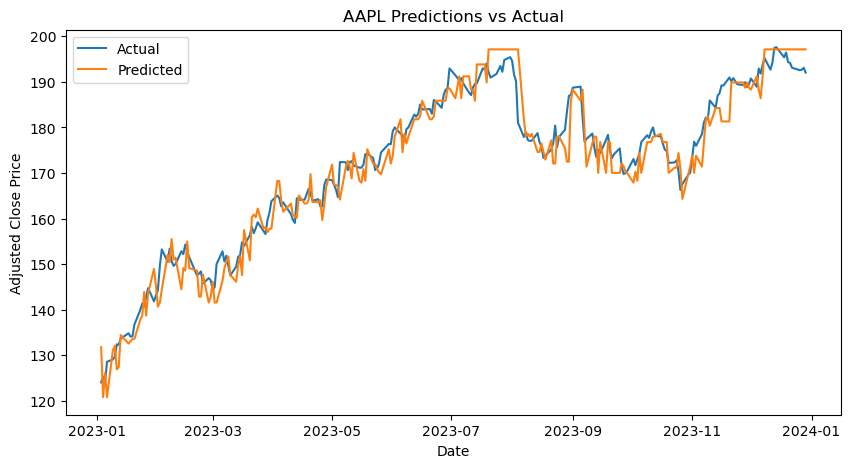

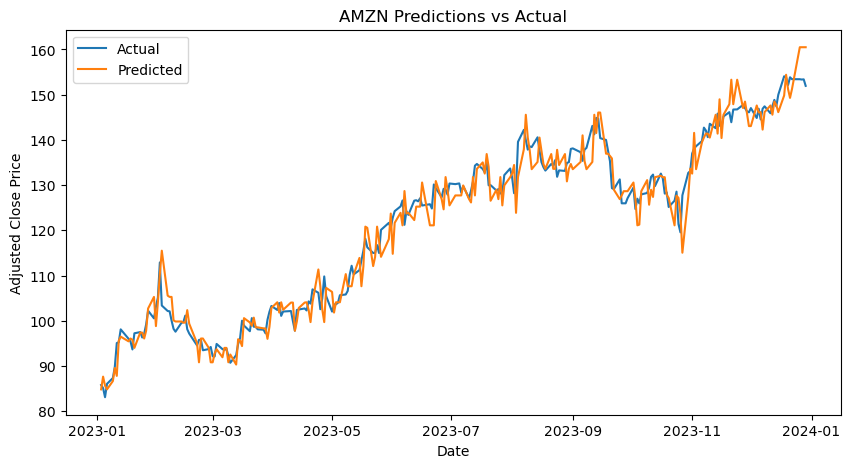

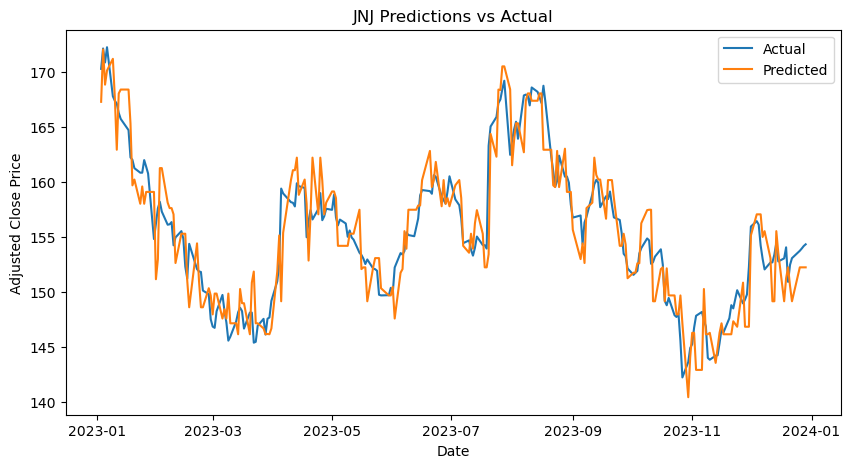

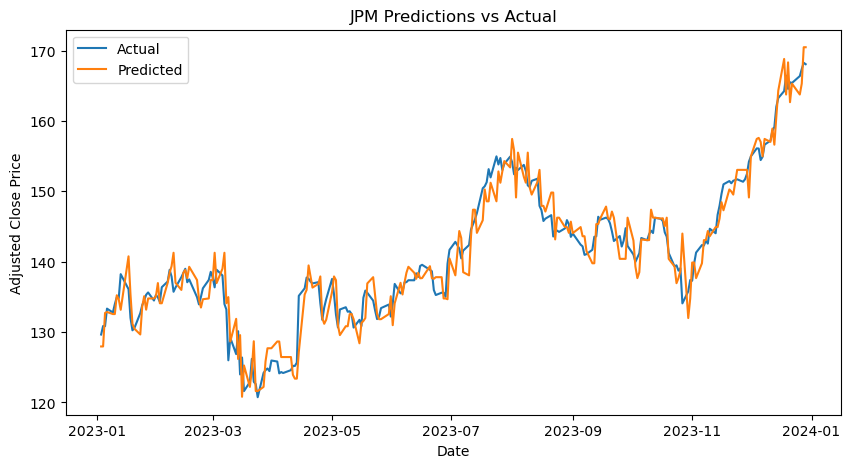

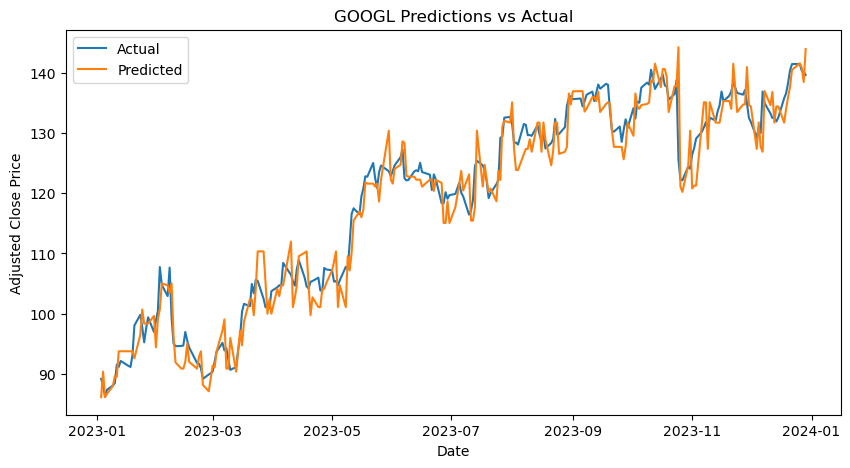

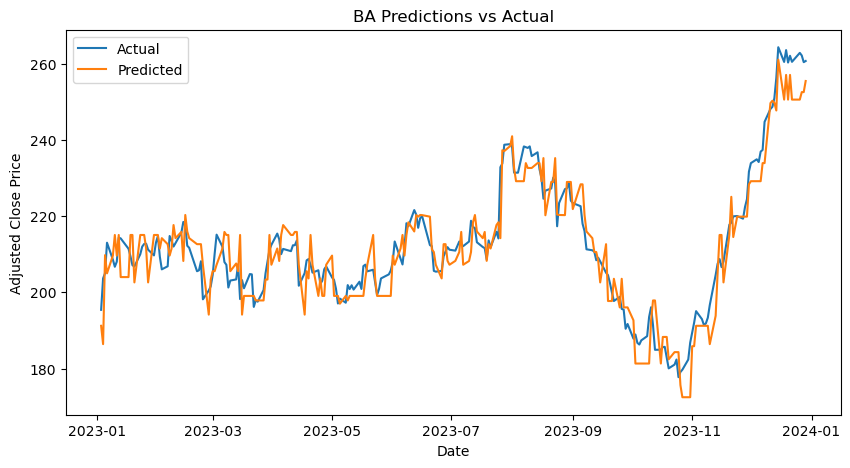

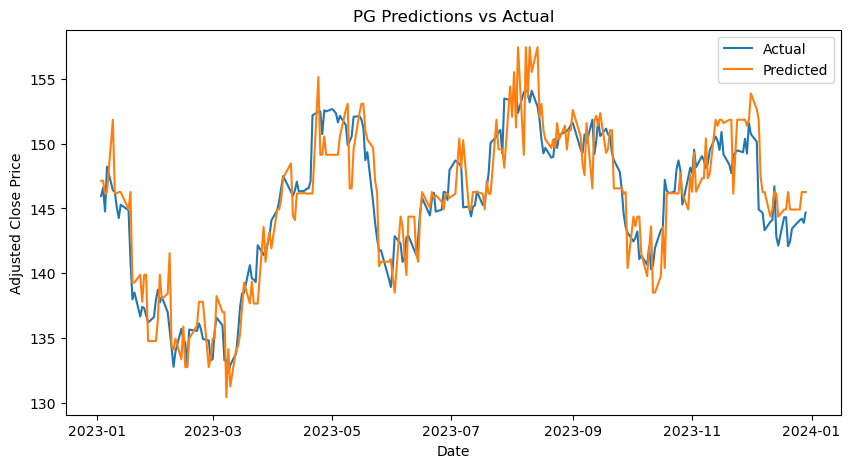

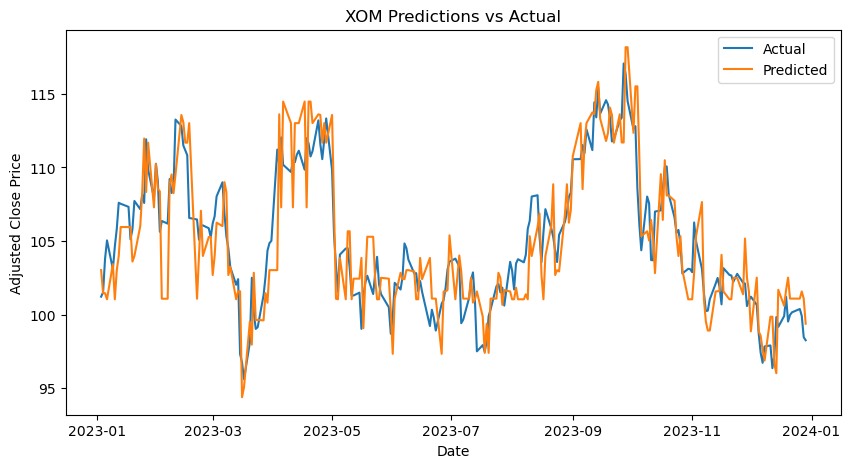

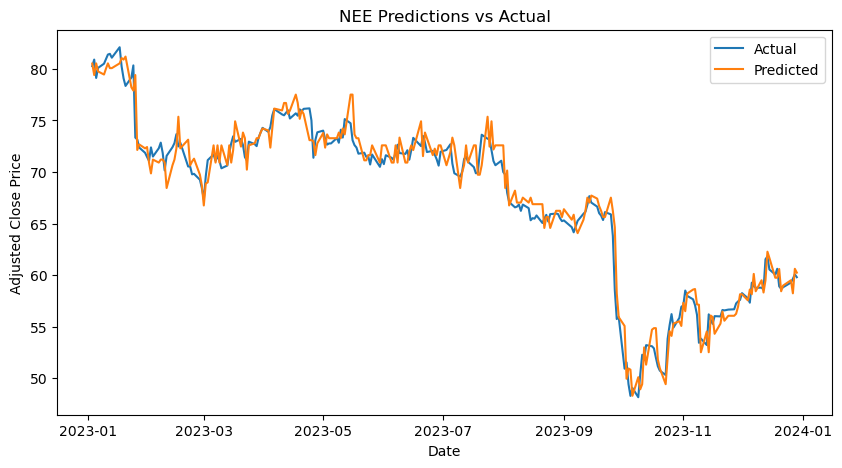

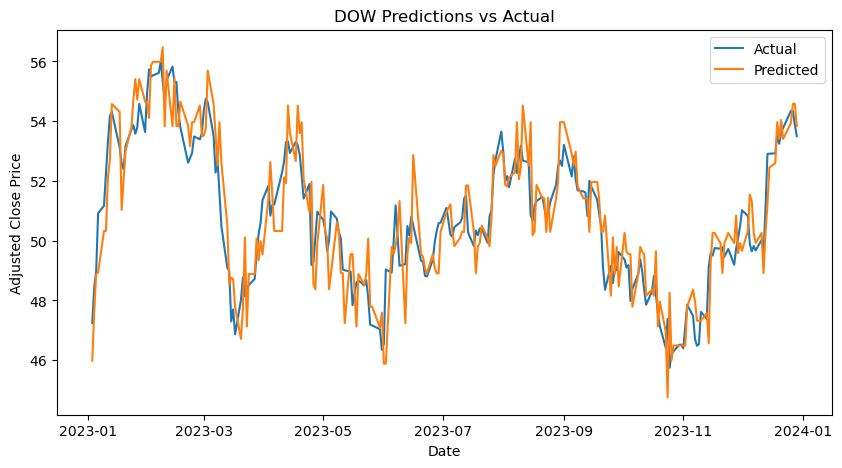

In [12]:
for stock in stocks:
    plt.figure(figsize=(10, 5))
    stock_data = predicted_vs_actual_rf_forecast[predicted_vs_actual_rf_forecast['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Actual'], label='Actual')
    plt.plot(stock_data['Date'], stock_data['Predicted'], label='Predicted')
    plt.title(f'{stock} Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

**Result**

From the result, we are seeing the model performed reasonably well on the test set. The mse of the predicted adj close is low, and a data inspection shows the predicted data are very close to the actual data.

#### Part 1-3 Market Forcasting with Linear Regression and SVM (Vincent)

In part 1-3, the other two algorithem we have picked are Linear Regression and SVM because of their reliability and strong performance over other machine learning.

**Linear Regression:
- Features: Lagged `Adj_Close`, `Open`, `High`, `Low`, `Close`, `Volume`, `Daily_Return`, `Rolling_Mean`, `Rolling_Std`, `Volume_Change`.
- Model Building: Standard Linear Regression model.
- Choosing k(lag) based on the training model.
- Evaluation: Predictions on test data and performance assessed using metrics like MSE.

**Support Vector Machines (SVM):
- Features: Lagged `Adj_Close`, `Open`, `High`, `Low`, `Close`, `Volume`, `Daily_Return`, `Rolling_Mean`, `Rolling_Std`, `Volume_Change`.
- Model Building: linear SVR models.
- Hyperparameter Tuning:
  - `C`
  - `Epsilon`
- Due to execution time considerations, we use random search with 20 iterations instead of grid search to find the optimal hyperparameters.
- Evaluation: Predictions on test data and performance assessed using metrics like MSE.


In [13]:
#data processing for Linear reg and svb
def create_lagged_features(data, lag):
    grouped = data.groupby('Stock')
    lagged_data = pd.DataFrame()
    
    for _, group in grouped:
        for i in range(1, lag + 1):
            group[f'Adj_Close_lag_{i}'] = group['Adj Close'].shift(i)
            group[f'Open_lag_{i}'] = group['Open'].shift(i)
            group[f'High_lag_{i}'] = group['High'].shift(i)
            group[f'Low_lag_{i}'] = group['Low'].shift(i)
            group[f'Close_lag_{i}'] = group['Close'].shift(i)
            group[f'Volume_lag_{i}'] = group['Volume'].shift(i)
            group[f'Daily_Return_lag_{i}'] = group['Daily_Return'].shift(i)
            group[f'Rolling_Mean_lag_{i}'] = group['Rolling_Mean'].shift(i)
            group[f'Rolling_Std_lag_{i}'] = group['Rolling_Std'].shift(i)
            group[f'Volume_Change_lag_{i}'] = group['Volume_Change'].shift(i)
        lagged_data = pd.concat([lagged_data, group])
    
    lagged_data.dropna(inplace=True)
    return lagged_data

def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

Evaluating lag 1...
Score for lag 1: 0.999084513021028
Evaluating lag 2...
Score for lag 2: 0.9990877999942109
Evaluating lag 3...
Score for lag 3: 0.9990899010101423
Evaluating lag 4...
Score for lag 4: 0.9990915297873211
Evaluating lag 5...
Score for lag 5: 0.9990941765566461
Evaluating lag 6...
Score for lag 6: 0.9990971780469851
Evaluating lag 7...
Score for lag 7: 0.9990988913378126
Evaluating lag 8...
Score for lag 8: 0.99910239513871
Evaluating lag 9...
Score for lag 9: 0.99910490095454
Evaluating lag 10...
Score for lag 10: 0.9991102480141844
Evaluating lag 11...
Score for lag 11: 0.9991127301707848
Evaluating lag 12...
Score for lag 12: 0.9991140947101784
Evaluating lag 13...
Score for lag 13: 0.9991154453675859
Evaluating lag 14...
Score for lag 14: 0.9991186452949308
Evaluating lag 15...
Score for lag 15: 0.9991201238326837
Evaluating lag 16...
Score for lag 16: 0.9991220982582024
Evaluating lag 17...
Score for lag 17: 0.9991234941840974
Evaluating lag 18...
Score for lag 18

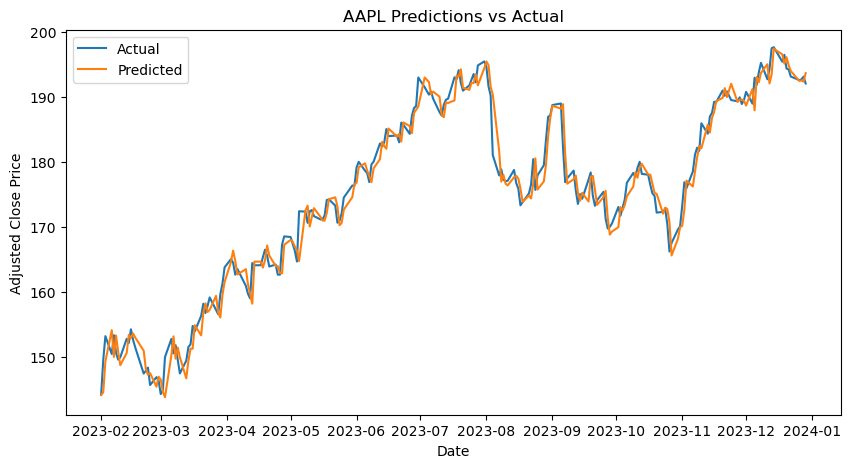

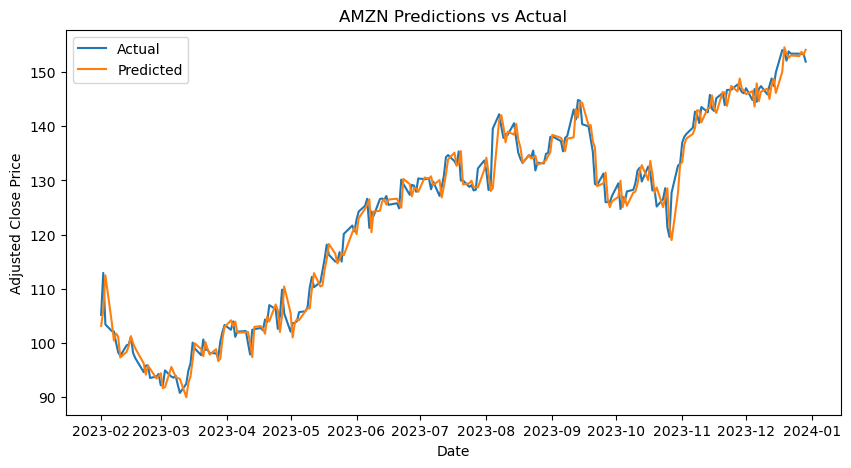

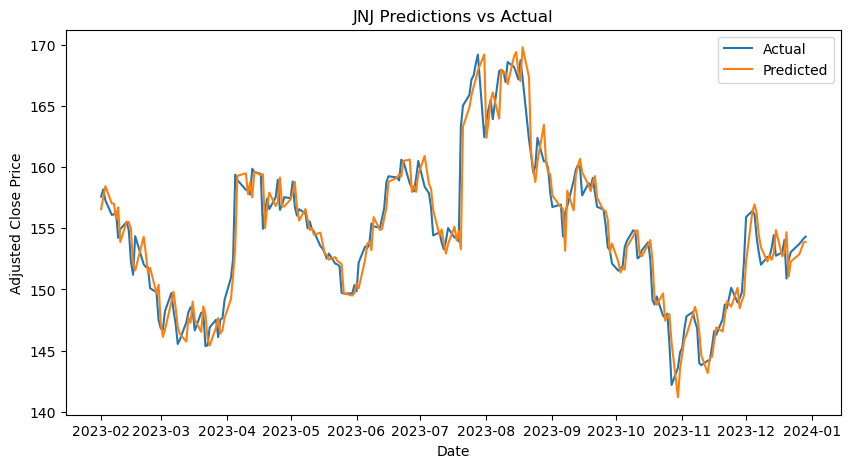

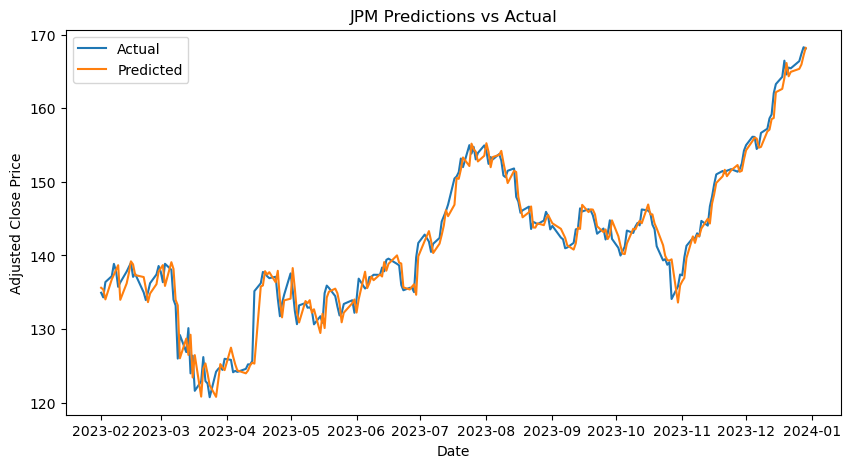

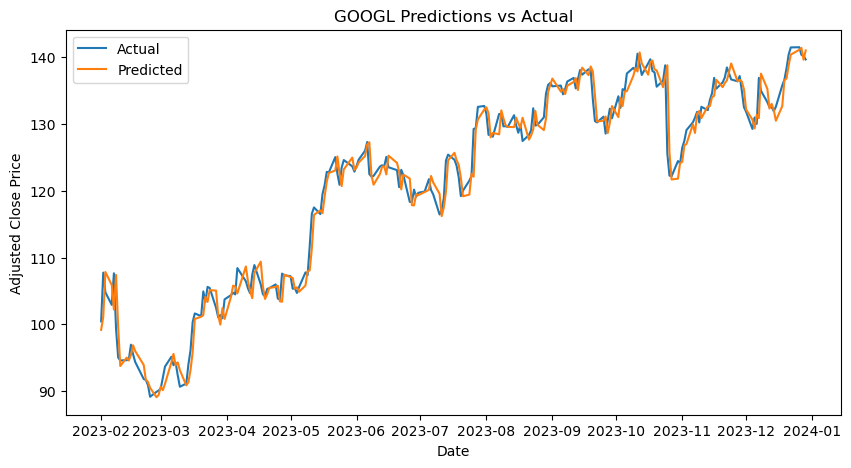

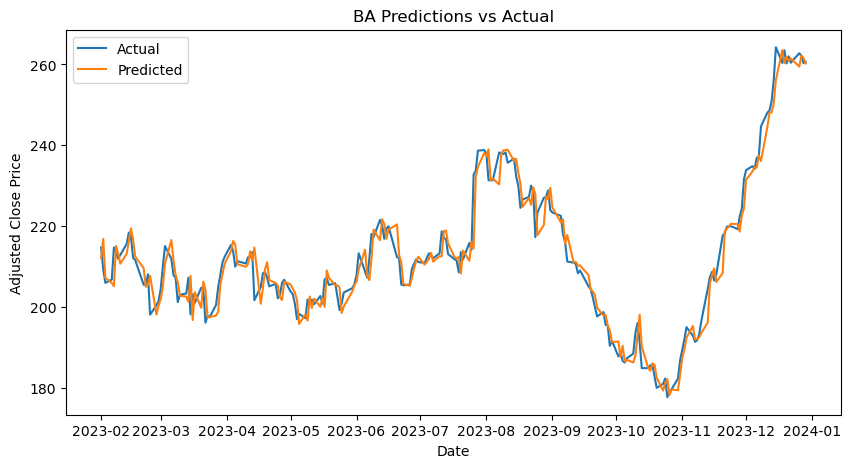

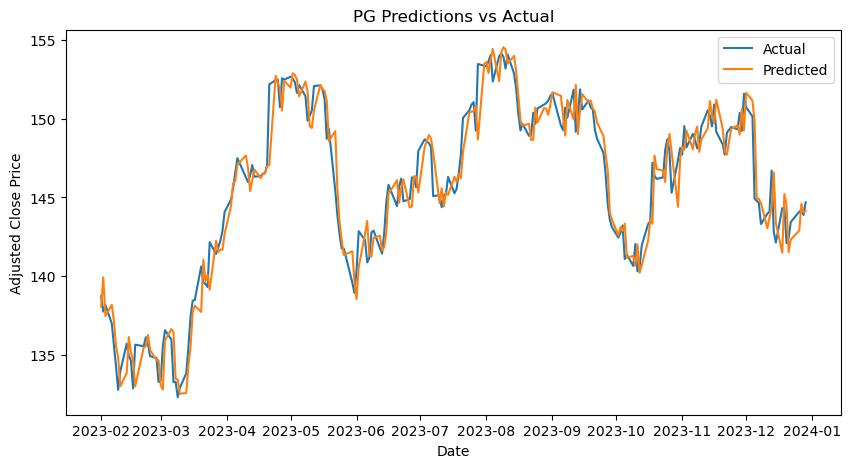

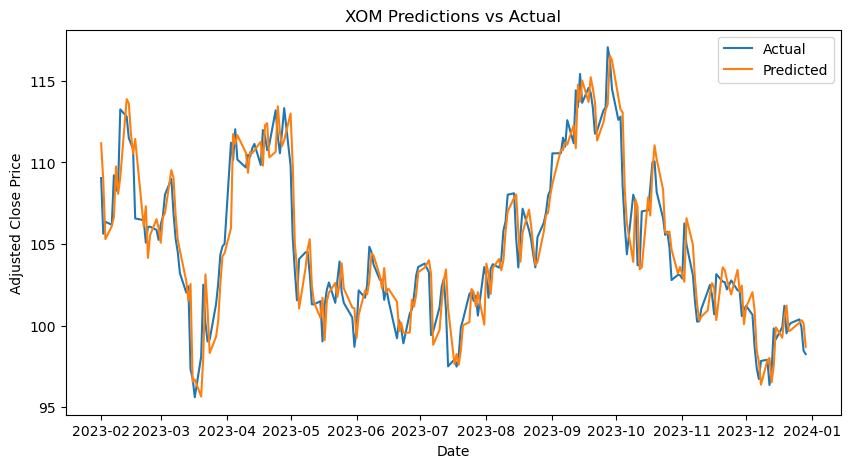

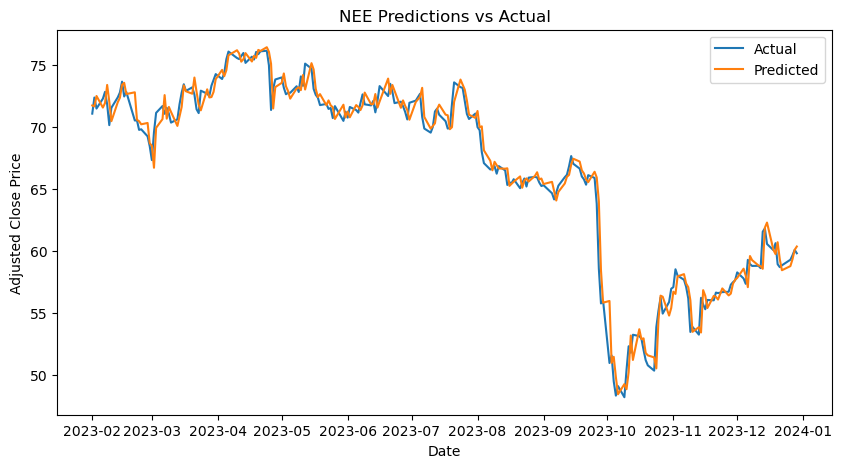

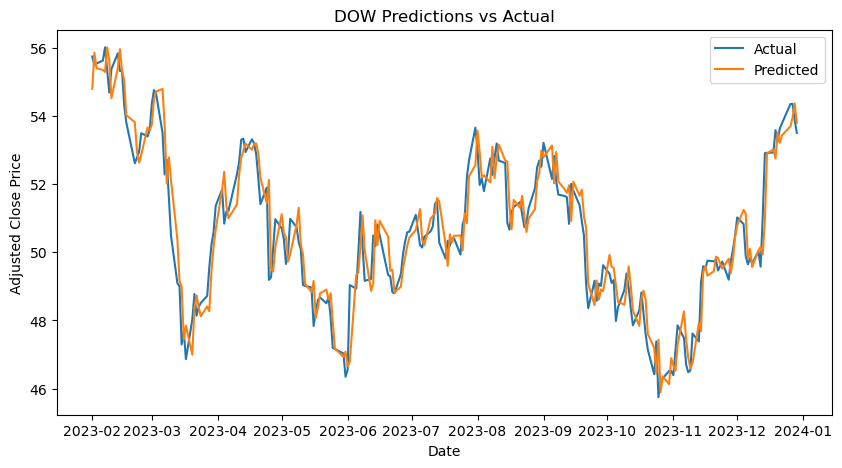

In [14]:
# Evaluate different lag (from 1 to 20) for linear reg
best_k_lr_forecast = 0
best_score_lr_forecast = float('-inf')

for k in range(1, 21):
    print(f"Evaluating lag {k}...")
    lagged_data = create_lagged_features(train_data.copy(), k)
    
    lagged_features = []
    for i in range(1, k + 1):
        lagged_features.extend([f'Adj_Close_lag_{i}', f'Open_lag_{i}', f'High_lag_{i}', f'Low_lag_{i}', f'Close_lag_{i}', f'Volume_lag_{i}', f'Daily_Return_lag_{i}', f'Rolling_Mean_lag_{i}', f'Rolling_Std_lag_{i}', f'Volume_Change_lag_{i}'])
    
    X_train = lagged_data[lagged_features + ['Dividends', 'Year', 'Month', 'Day', 'DayOfWeek']]
    y_train = lagged_data[target]
    
    X_train_scaled, _ = scale_features(X_train, X_train)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    score = lr_model.score(X_train_scaled, y_train)
    
    print(f"Score for lag {k}: {score}")
    
    if score > best_score_lr_forecast:
        best_k_lr_forecast = k
        best_score_lr_forecast = score

print(f"Best lag: {best_k_lr_forecast}, Best score: {best_score_lr_forecast}")



#Train a finalized model with the optimal lag
lagged_data_lr_best_lag = create_lagged_features(train_data.copy(), best_k_lr_forecast)

lagged_features = []
for i in range(1, best_k_lr_forecast + 1):
    lagged_features.extend([f'Adj_Close_lag_{i}', f'Open_lag_{i}', f'High_lag_{i}', f'Low_lag_{i}', f'Close_lag_{i}', f'Volume_lag_{i}', f'Daily_Return_lag_{i}', f'Rolling_Mean_lag_{i}', f'Rolling_Std_lag_{i}', f'Volume_Change_lag_{i}'])

lagged_features_lr_best_lag = lagged_features + ['Dividends', 'Year', 'Month', 'Day', 'DayOfWeek']
X_train_lr_best_lag = lagged_data_lr_best_lag[lagged_features_lr_best_lag]
y_train_lr_best_lag = lagged_data_lr_best_lag[target]

X_train_scaled_lr_best_lag, _ = scale_features(X_train_lr_best_lag, X_train_lr_best_lag)

final_model_lr_best_lag = LinearRegression()
final_model_lr_best_lag.fit(X_train_scaled_lr_best_lag, y_train_lr_best_lag)


lagged_test_data_lr_best_lag = create_lagged_features(test_data.copy(), best_k_lr_forecast)
X_test_lr_best_lag = lagged_test_data_lr_best_lag[lagged_features_lr_best_lag]
y_test_lr_best_lag = lagged_test_data_lr_best_lag[target]

_, X_test_scaled_lr_best_lag = scale_features(X_train_lr_best_lag, X_test_lr_best_lag)

predictions_lr_best_lag = final_model_lr_best_lag.predict(X_test_scaled_lr_best_lag)
mse_lr_best_lag = mean_squared_error(y_test_lr_best_lag, predictions_lr_best_lag)
print(f"Mean Squared Error on test data with best lag: {mse_lr_best_lag}")

predicted_vs_actual_lr_best_lag = pd.DataFrame({'Date': lagged_test_data_lr_best_lag['Date'], 'Stock': lagged_test_data_lr_best_lag['Stock'], 'Actual': y_test_lr_best_lag, 'Predicted': predictions_lr_best_lag})

#plot for evaluation
for stock in stocks:
    plt.figure(figsize=(10, 5))
    stock_data = predicted_vs_actual_lr_best_lag[predicted_vs_actual_lr_best_lag['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Actual'], label='Actual')
    plt.plot(stock_data['Date'], stock_data['Predicted'], label='Predicted')
    plt.title(f'{stock} Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


From the results of the linear regression model, we can visually see that the predicted price is very close to the actual test price, and the MSE is not high, infact, very close to the MSE of the traning set.

/Users/vincentzhang/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vincentzhang/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vincentzhang/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vincentzhang/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vincentzhang/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vincentzhang/anaconda3/lib/python3.11/site-packages/s

Best params: {'C': 83.34426408004217, 'epsilon': 0.26480693281393136}, Best score: -3.6356832341801115
Mean Squared Error on test data with LinearSVR: 4.108125255596982


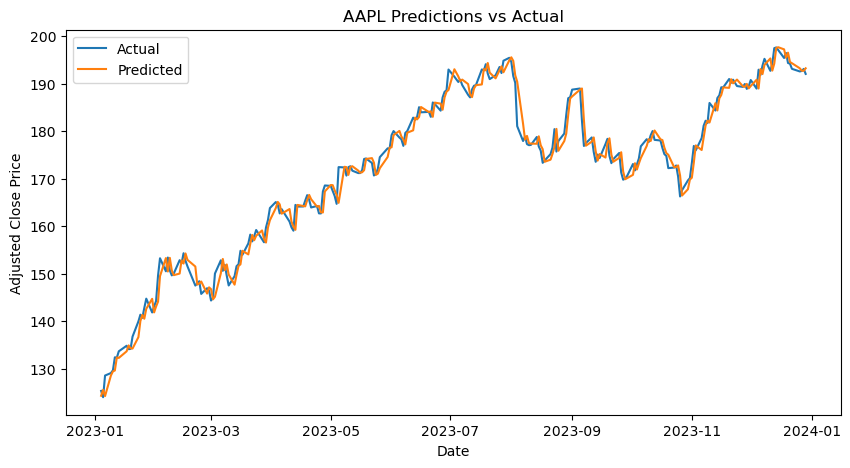

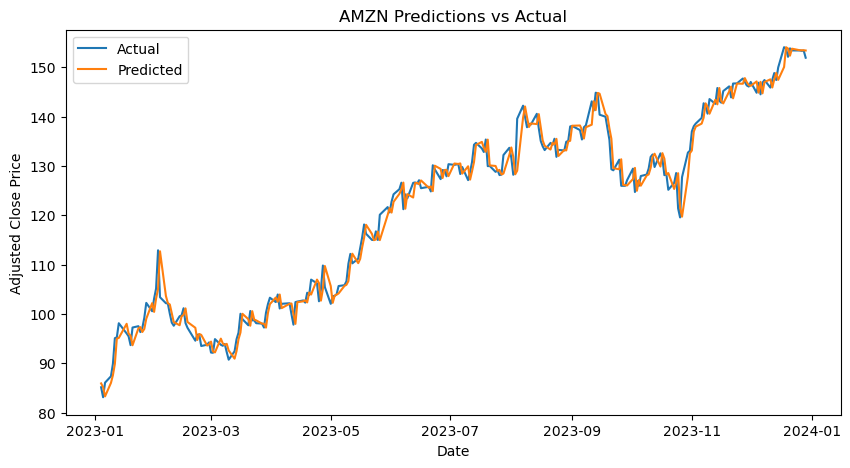

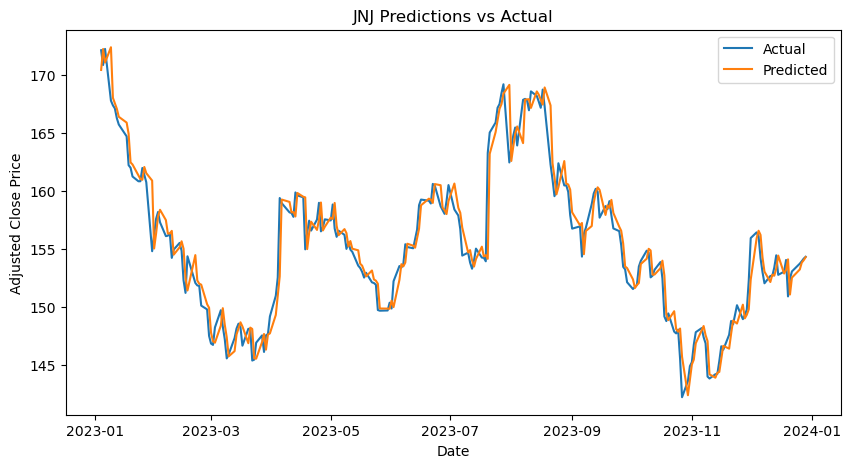

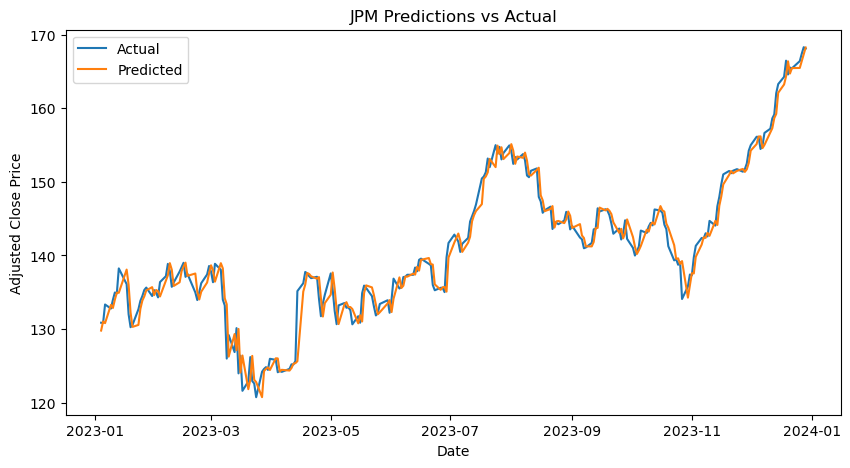

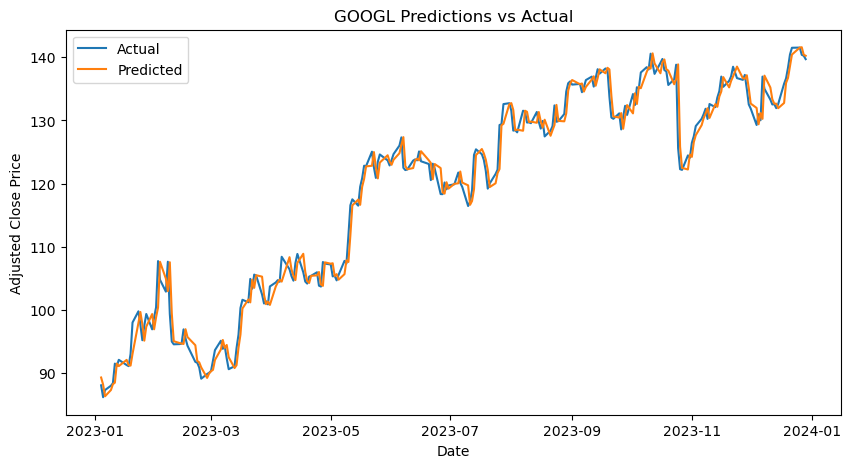

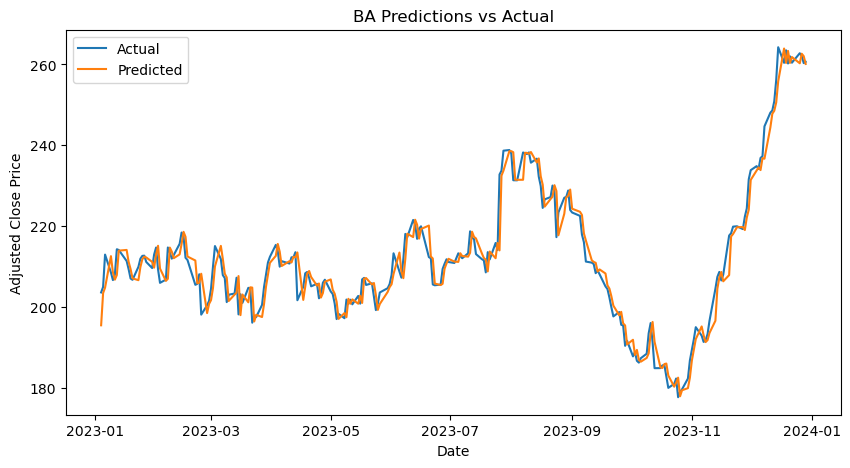

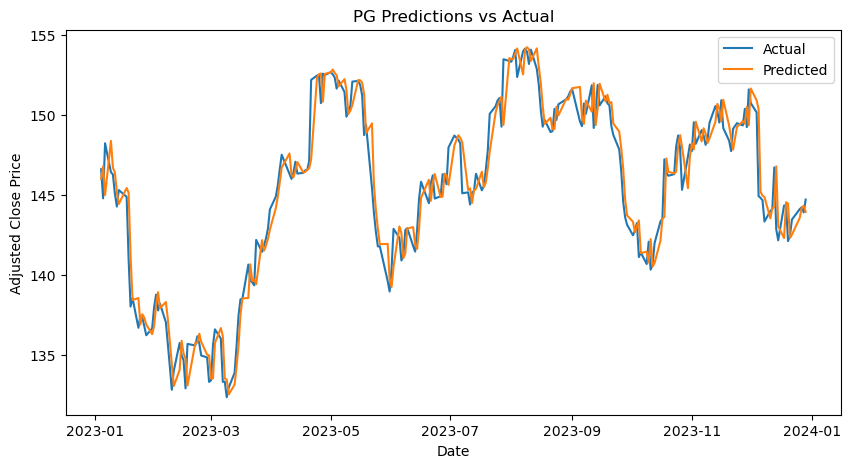

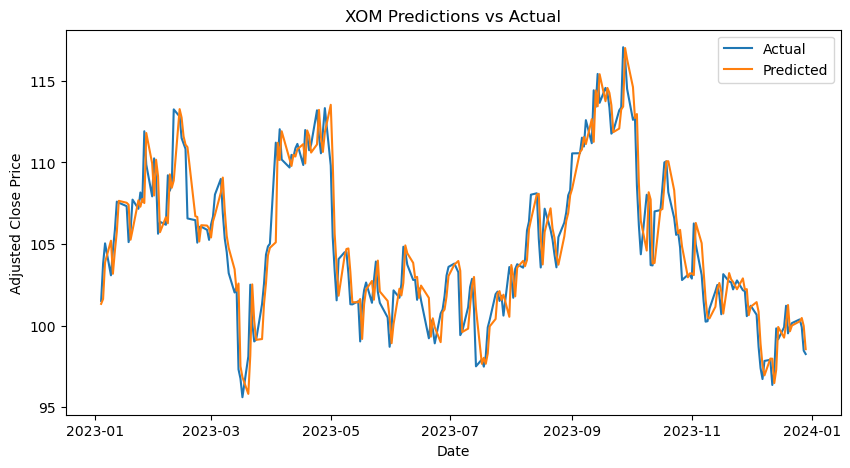

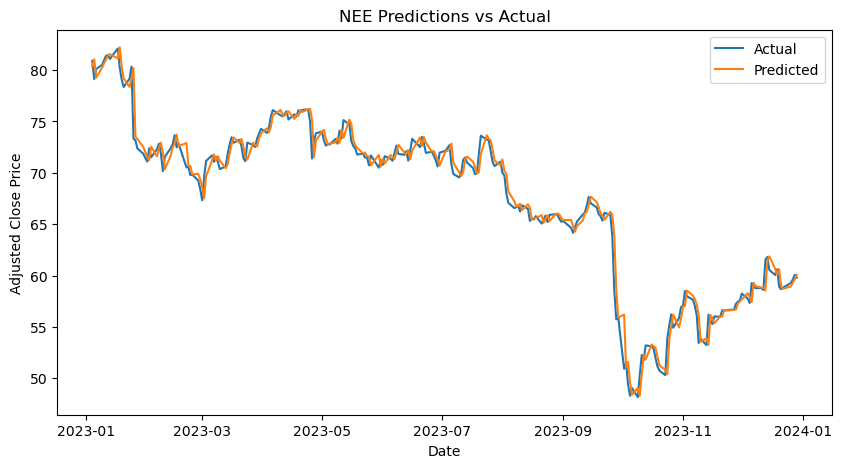

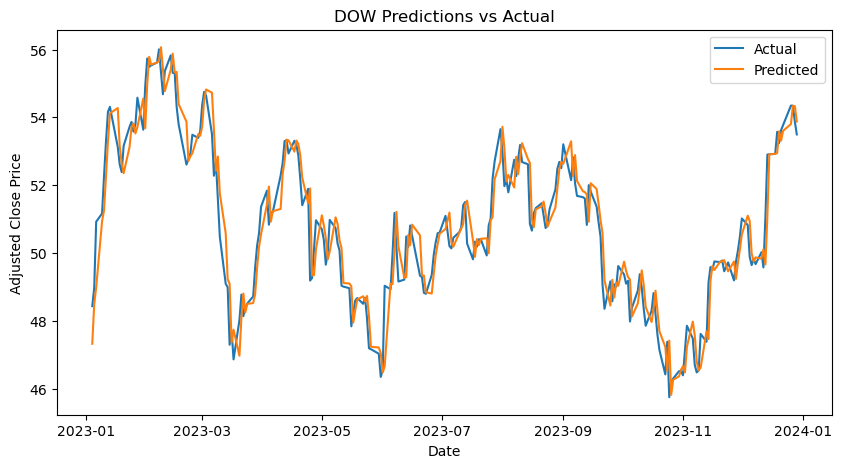

In [15]:
#Use lag = 1 to reduce computation 
warnings.filterwarnings('ignore')

lag = 1
train_lagged = create_lagged_features(train_data.copy(), lag)
test_lagged = create_lagged_features(test_data.copy(), lag)

lagged_features = []
for i in range(1, lag + 1):
    lagged_features.extend([f'Adj_Close_lag_{i}', f'Open_lag_{i}', f'High_lag_{i}', f'Low_lag_{i}', f'Close_lag_{i}', f'Volume_lag_{i}', f'Daily_Return_lag_{i}', f'Rolling_Mean_lag_{i}', f'Rolling_Std_lag_{i}', f'Volume_Change_lag_{i}'])

features = lagged_features + ['Dividends', 'Year', 'Month', 'Day', 'DayOfWeek']
target = 'Adj Close'

X_train = train_lagged[features]
y_train = train_lagged[target]

X_test = test_lagged[features]
y_test = test_lagged[target]

#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#random serach for svr
def random_search_hyperparameters_linear_svr(X, y, scoring='neg_mean_squared_error'):
    tscv = TimeSeriesSplit(n_splits=5)
    param_distributions = {
        'C': uniform(0.1, 100),
        'epsilon': uniform(0.01, 1.2)
    }
    model = LinearSVR(dual='auto', max_iter=100000, random_state=42)
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=20, cv=tscv, scoring=scoring, n_jobs=-1, random_state=42)
    random_search.fit(X, y)
    return random_search.best_params_, random_search.best_score_

best_params_linear_svr, best_score_linear_svr = random_search_hyperparameters_linear_svr(X_train_scaled, y_train)
print(f"Best params: {best_params_linear_svr}, Best score: {best_score_linear_svr}")

#Train the final model with parameters above
final_model_linear_svr = LinearSVR(dual='auto', max_iter=500000, **best_params_linear_svr, random_state=42)
final_model_linear_svr.fit(X_train_scaled, y_train)

#predict
predictions_linear_svr = final_model_linear_svr.predict(X_test_scaled)
mse_linear_svr = mean_squared_error(y_test, predictions_linear_svr)
print(f"Mean Squared Error on test data with LinearSVR: {mse_linear_svr}")

predicted_vs_actual_linear_svr = pd.DataFrame({'Date': test_lagged['Date'], 'Stock': test_lagged['Stock'], 'Actual': y_test, 'Predicted': predictions_linear_svr})

# plot
for stock in stocks:
    plt.figure(figsize=(10, 5))
    stock_data = predicted_vs_actual_linear_svr[predicted_vs_actual_linear_svr['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Actual'], label='Actual')
    plt.plot(stock_data['Date'], stock_data['Predicted'], label='Predicted')
    plt.title(f'{stock} Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


**Result**

From the result, we are seeing the model performed reasonably well on the test set. The mse of the predicted adj close is lower than the linear regression's case, and a data inspection shows the predicted data are very close to the actual data.

### Part 2 - Portfolio Management with Forcasted Data

#### Objective
In this part, we are going to use the data and forecasting model we get from part 1, to predict the stock prices and come up with a rebalance strategy for our portfolio. We will come up with an portfolio rebalancing model to provide us an exact portfolio in each trading day of 2023, such that the overall return maximized. 


#### Procedure

1. **Forecast Stock Prices:**

    - Use forecasted stock prices in Part 1 for each trading day in 2023. 
    
    
---
    
    
2. **Calculate Predicted Returns:**

    - Compute the predicted daily returns based on the forecasted adjusted close prices:
    
      $$ r_i(t) = \frac{\text{Predicted Adjusted Close Price}_i(t) - \text{Adjusted Close Price}_i(t-1)}{\text{Adjusted Close Price}_i(t-1)} $$
      
      
---

3. **Adjust Portfolio Weights:**

    - Adjust the portfolio weights proportionally to the predicted returns using the softmax function to ensure a balanced distribution:
    
      $$ w_i(t) = \frac{e^{r_i(t)}}{\sum_{j=1}^{n} e^{r_i(t)}} $$
      
    - This ensures diversification and prevents an all-in strategy.

---

4. **Train Rebalance Model:**

    - Train the rebalance model using the predicted returns as features to predict another set of returns. The training process and the model will be different for each model. This model is evaluated based on the weighted return of the portfolio.


---

5. **Rebalance Portfolio:**


   - Use the weights adjusted by the rebalance model to calculate the daily and cumulative returns of the portfolio.
    
        
--- 

6. **Evaluate Performance:**


    - Assessed by cumulative return over the test period.



#### Part 2-1 Portfolio Management with Model 1 (Hai)

**Summary**

In part 2-1, we use the FNN model from part 1 to predict the adjusted close prices of stocks and dynamically adjust portfolio weights based on these predictions. Instead of directly using the predicted prices, we adjust the weights proportionally to the predicted returns to ensure a balanced distribution. For each trading day, the weights are updated dynamically based on the predicted daily returns from the FNN model. These adjusted weights are then used to calculate the portfolio's daily returns and the cumulative returns over the test period. This approach avoids over-investment in the best-performing stock historically and aims for a more balanced and potentially more profitable portfolio performance.

In [16]:
# Combine all forecasted data into a single DataFrame
forecasted_results_fnn = []

for stock in stocks:
    stock_test_data_fnn = test_data[test_data['Stock'] == stock]
    stock_test_data_lagged_fnn = create_lagged_features_fnn(stock_test_data_fnn.copy(), 10)
    X_stock_test_scaled_fnn = scaler_fnn.transform(stock_test_data_lagged_fnn.drop(['Stock', 'Date', target], axis=1))
    stock_test_dates_fnn = stock_test_data_lagged_fnn['Date']
    y_stock_pred_fnn = model_fnn.predict(X_stock_test_scaled_fnn)
    
    stock_forecasted_data_fnn = pd.DataFrame({
        'Date': stock_test_dates_fnn,
        'Stock': stock,
        'Forecasted_Adj_Close': y_stock_pred_fnn.flatten()
    })
    
    forecasted_results_fnn.append(stock_forecasted_data_fnn)

forecasted_data_fnn = pd.concat(forecasted_results_fnn)
forecasted_data_fnn.reset_index(drop=True, inplace=True)

print(forecasted_data_fnn)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
           Date Stock  Forecasted_Adj_Close
0    2023-01-18  AAPL            136.083755
1    2023-01-19  AAPL            136.568466
2    2023-01-20  AAPL            137.834610
3    2023-01-23  AAPL            141.807266
4    2023-01-24  AAPL            142.904953
...         ...   ...                   ...
2395 2023-12-22   DOW             53.879028
2396 2023-12-26   DOW             54.644753
2397 2023-12-27   DOW             54.297375
2398 2023-12-28   DOW             54.640568
2399 2023-12-29   DOW             54.075264

[2400 rows x 3 columns]


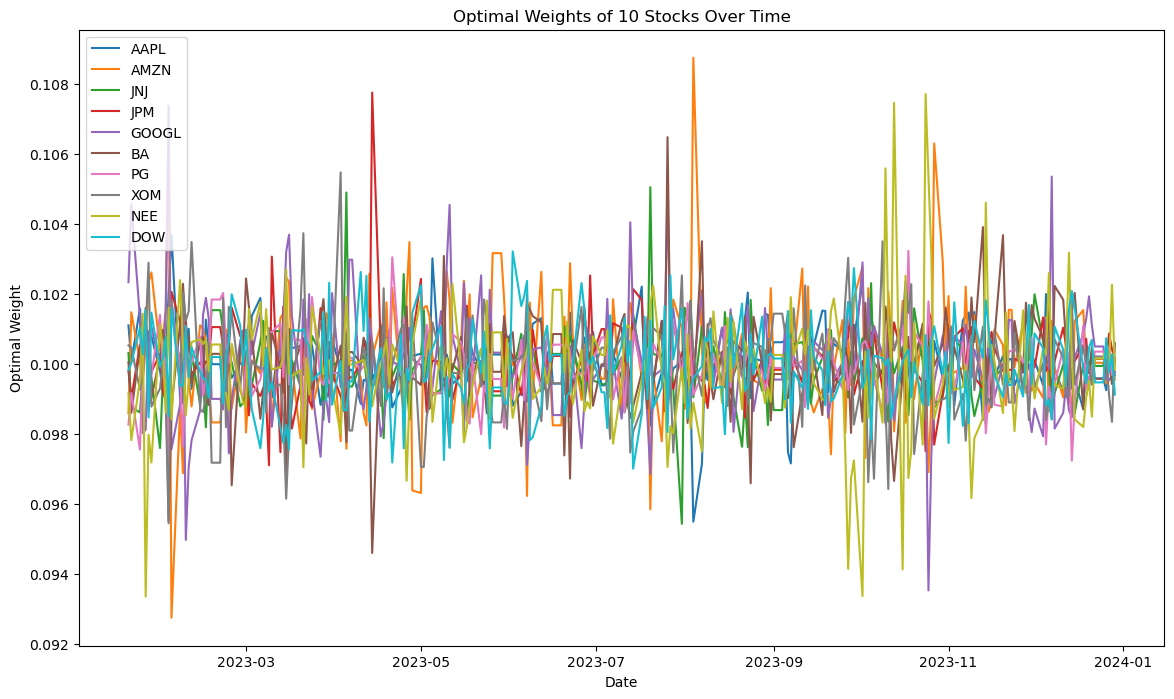

In [17]:
# Plot optimal weights over time
forecasted_data_fnn['Forecasted_Daily_Return'] = forecasted_data_fnn.groupby('Stock')['Forecasted_Adj_Close'].pct_change()

dates_fnn = pd.date_range(start='2023-01-01', end='2023-12-31', freq='B')
dynamic_weights_df_fnn = pd.DataFrame(index=dates_fnn, columns=stocks)

for date in dates_fnn:
    daily_forecast_fnn = forecasted_data_fnn[forecasted_data_fnn['Date'] == date]
    if not daily_forecast_fnn.empty:
        forecasted_returns_fnn = daily_forecast_fnn.set_index('Stock')['Forecasted_Daily_Return']
        adjusted_weights_fnn = np.exp(forecasted_returns_fnn) / np.sum(np.exp(forecasted_returns_fnn))
        dynamic_weights_df_fnn.loc[date] = adjusted_weights_fnn

dynamic_weights_df_fnn.fillna(method='ffill', inplace=True)

plt.figure(figsize=(14, 8))
for stock in stocks:
    plt.plot(dynamic_weights_df_fnn.index, dynamic_weights_df_fnn[stock], label=stock)

plt.xlabel('Date')
plt.ylabel('Optimal Weight')
plt.title('Optimal Weights of 10 Stocks Over Time')
plt.legend(loc='upper left')
plt.show()

Overall return throughout the year: 1.1749541252131925


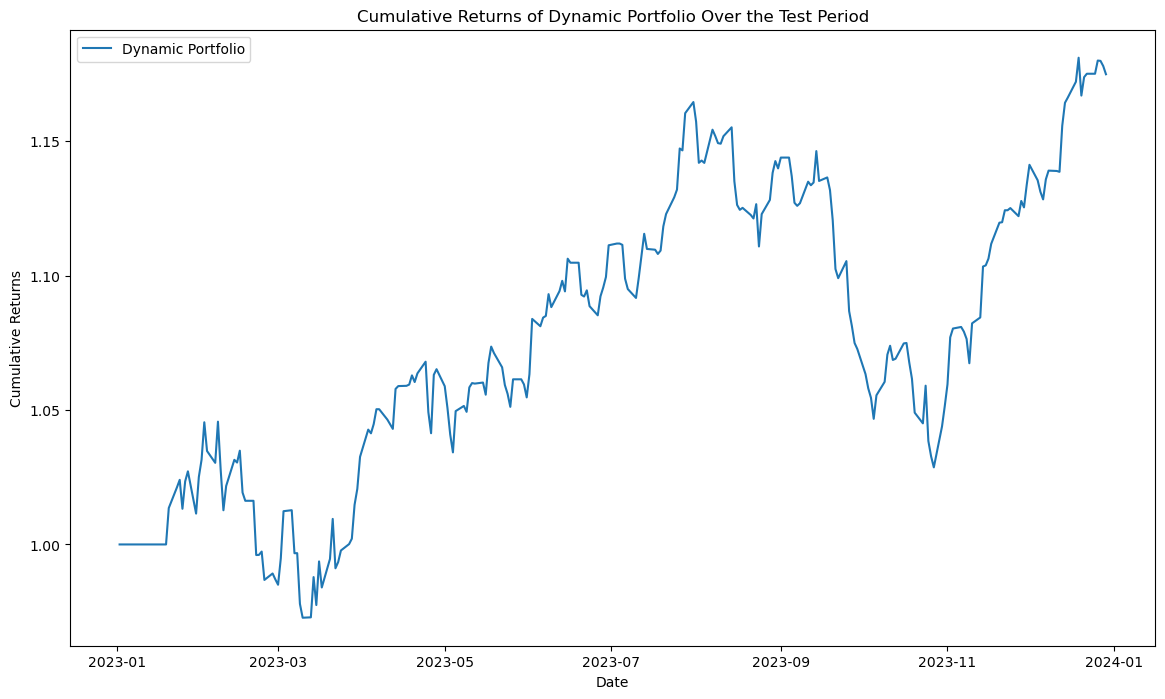

In [19]:
# Plot cumulative returns
test_data_period_fnn = test_data[(test_data['Date'] >= '2023-01-01') & (test_data['Date'] <= '2023-12-31')]
test_data_pivot_fnn = test_data_period_fnn.pivot(index='Date', columns='Stock', values='Adj Close')

actual_returns_fnn = test_data_pivot_fnn.pct_change().dropna()
portfolio_daily_returns_fnn = (actual_returns_fnn * dynamic_weights_df_fnn.shift(1).fillna(method='ffill')).sum(axis=1)
cumulative_returns_fnn = (1 + portfolio_daily_returns_fnn).cumprod()
overall_return_fnn = cumulative_returns_fnn.iloc[-1]
print("Overall return throughout the year:", overall_return_fnn)

plt.figure(figsize=(14, 8))
plt.plot(cumulative_returns_fnn, label='Dynamic Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Dynamic Portfolio Over the Test Period')
plt.legend(loc='upper left')
plt.show()

**Result**

The results of the dynamic portfolio optimization and cumulative returns analysis indicate a high level of variability in the optimal weights assigned to the 10 stocks over the year 2023. The first plot shows the optimal weights fluctuating significantly, reflecting the dynamic nature of the strategy as it adapts to forecasted returns. This variability suggests that the model is responsive to changing market conditions, though the high frequency of fluctuations may also indicate potential overfitting or sensitivity to short-term noise.

The second plot, depicting the cumulative returns of the dynamic portfolio, presents a generally positive trajectory over the test period. Despite some periods of volatility and drawdowns, the overall trend is upward, suggesting that the dynamic weighting approach outperforms a static strategy. The cumulative returns exceed 1.15 by the end of the year, indicating a 15% gain. This performance highlights the potential of using machine learning models for adaptive portfolio management, though further analysis and validation are necessary to ensure robustness and generalizability.

#### Part 2-2 Portfolio Management with Random Forest (Heming)

**Summary**

In part 2-2, we start with using Random Forest model we get from Part 1-2 to predict the adjusted close price of stocks. However, we can't directly use the predicted adjusted close price (and the return derived from it) to do the portfolio rebalancement, as it can easily be an all-in strategy to fully invest on the stock that has the best historical performance. Instead, I am doing it in following manner:

* Adjust weight based on the predicted return (we will get this in next step). The weight are distributed as follows:
$$\frac{e^{r_i}}{\sum_{i=1}^{10}e^{r_i}}$$
* Train another random forest model (calling it rebalance model), such that it now takes the predicted_return (calculated from the predicted adjusted close price) as a feature too, then predict another return (call it predicted_returns_rev). The performance of rebalance model's prediction will be scored based on the weighted return of the portfolio, where the weight is adjusted based on predicted_returns_rev, and use the actual return.

The reason why we need to do this is because the previous model we trained in 1-2 is scoring based on how close the prediction is with the acutal data (using MSE). However, in a weight rebalance case, it should not use the same benchmark; but instead, the closer the ratio of our forecasted returns are compared to actual return, the better it is. Therefore, another model is necessary. Mostly, the customized scorer to calculate the weighted return is the key point.

After we have the weight, we can then calculate the cumulative return throughout the year. I also evaluated if we should scale the return before assigning the weight, but no scaling case gives the best performance. Since it is not part of the machine learning model evaluation, I am not going to include it in the code.

In [20]:
# Predict adjusted close price (and predicted return) using models from part 1-2 and add into the dataset as feature to train rebalancing model.
lagged_data_full = create_lagged_features_rf_forecast(full_data.copy(), best_k_rf_forecast)
_, X_rebalance_predict_base = scale_features_rf_forecast(X_train_rf_forecast, lagged_data_full[lagged_features_rf_forecast])
X_rebalance_predictions = final_model_rf_forecast.predict(X_rebalance_predict_base)

lagged_data_full['Predicted_Adj_Close'] = X_rebalance_predictions
lagged_data_full['Predicted_Return'] = (lagged_data_full['Predicted_Adj_Close'] - lagged_data_full['Adj_Close_lag_1']) / lagged_data_full['Adj_Close_lag_1']

print(lagged_data_full)

Price       Date        Open        High         Low       Close   Adj Close  \
20    2010-02-02    6.996786    7.011429    6.906429    6.995000    5.913944   
21    2010-02-03    6.970357    7.150000    6.943571    7.115357    6.015697   
22    2010-02-04    7.026071    7.084643    6.841786    6.858929    5.798902   
23    2010-02-05    6.879643    7.000000    6.816071    6.980714    5.901864   
24    2010-02-08    6.988929    7.067143    6.928571    6.932857    5.861403   
...          ...         ...         ...         ...         ...         ...   
3517  2023-12-22  102.309998  102.940002  101.820000  101.910004  100.158081   
3518  2023-12-26  102.739998  103.029999  102.120003  102.139999  100.384125   
3519  2023-12-27  102.040001  102.550003  101.339996  101.660004   99.912376   
3520  2023-12-28  101.389999  101.610001  100.129997  100.190002   98.467644   
3521  2023-12-29  100.370003  100.589996   99.620003   99.980003   98.261261   

Price       Volume Stock  Dividends  Da

In [21]:
# Prepare the train and test data for the rebalance model. The model we are training here is to assure our estimated adj_close and predicted return are as close to actual return as possible.
# The target is the actual daily return, the features are exsiting features in part 1 + our predicted return.
rebalancing_features_rf = lagged_features_rf_forecast + ['Predicted_Return']

test_data_extended_rf_pm = (lagged_data_full[lagged_data_full['Date'] >= lag_start_date]).copy()
train_data_rf_pm = (lagged_data_full[lagged_data_full['Date'] < '2023-01-01']).copy()

X_train_rebalance_rf = train_data_rf_pm[rebalancing_features_rf]
X_test_rebalance_rf = test_data_extended_rf_pm[rebalancing_features_rf]

print(X_train_rebalance_rf.shape)
print(X_test_rebalance_rf)

y_train_rebalance_rf = train_data_rf_pm['Daily_Return']
y_test_rebalance_rf = test_data_extended_rf_pm['Daily_Return']

print(y_train_rebalance_rf.shape)
print(y_test_rebalance_rf)

(30203, 16)
Price  Adj_Close_lag_1  Open_lag_1  High_lag_1   Low_lag_1  Close_lag_1  \
3271        128.550934  127.989998  130.479996  127.730003   129.610001   
3272        128.868317  128.410004  129.949997  127.430000   129.929993   
3273        124.048042  130.279999  130.899994  124.169998   125.070000   
3274        125.327507  126.889999  128.660004  125.080002   126.360001   
3275        123.998451  127.129997  127.769997  124.760002   125.019997   
...                ...         ...         ...         ...          ...   
3517         99.981178  101.470001  102.010002  100.809998   101.730003   
3518        100.158081  102.309998  102.940002  101.820000   101.910004   
3519        100.384125  102.739998  103.029999  102.120003   102.139999   
3520         99.912376  102.040001  102.550003  101.339996   101.660004   
3521         98.467644  101.389999  101.610001  100.129997   100.190002   

Price  Volume_lag_1  Daily_Return_lag_1  Rolling_Mean_lag_1  \
3271     75703700.0     

In [22]:
# Define several utility functions to calculate the overall portfolio return and a customized scorer
def calculate_portfolio_return(weights, returns, axis=None):
    return np.sum(weights * returns, axis=axis)

def portfolio_return_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    weights = np.exp(predictions) / np.sum(np.exp(predictions))
    return calculate_portfolio_return(weights, y)

In [23]:
# Random serach to find optimal model and fit the model. The scorer here is: adjust weight based on predicted return, and calculate the acutal return as score.
# A good model estimates the returns among the stocks more adhere to the ratio of the actual returns of those stocks, and therefore give the optimal weight strategy.
rebalance_model_rf = RandomForestRegressor(random_state=42)
random_search_rf_pm_best_params, _ = random_search_hyperparameters_rf_forecast(X_train_rebalance_rf, y_train_rebalance_rf, portfolio_return_scorer)

final_model_rf_pm = RandomForestRegressor(**random_search_rf_pm_best_params, random_state=42)
final_model_rf_pm.fit(X_train_rebalance_rf, y_train_rebalance_rf)

RandomForestRegressor(bootstrap=False, max_features=None, max_leaf_nodes=30,
                      min_samples_leaf=2, min_samples_split=8, n_estimators=85,
                      random_state=42)

In [24]:
# Use the model to predict return and assign weight. Then get data for the daily return if the portfolio is implemented based on the assigned weight.
predicted_returns_rf = final_model_rf_pm.predict(X_test_rebalance_rf)
test_data_extended_rf_pm['Predicted_Returns_rev'] = predicted_returns_rf
predicted_weight_rf = np.exp(predicted_returns_rf) / np.sum(np.exp(predicted_returns_rf), keepdims=True)
test_data_extended_rf_pm['Predicted_Weight'] = predicted_weight_rf
predicted_weight_rf = test_data_extended_rf_pm[['Date', 'Stock', 'Predicted_Weight']].pivot(index='Date', columns='Stock', values='Predicted_Weight')
predicted_weight_rf = predicted_weight_rf.div(predicted_weight_rf.sum(axis=1), axis=0)

actual_daily_returns_rf = test_data_extended_rf_pm.pivot(index='Date', columns='Stock', values='Daily_Return')
actual_weighted_returns_rf = calculate_portfolio_return(predicted_weight_rf.values, actual_daily_returns_rf.values, 1)

print(test_data_extended_rf_pm)
print(predicted_weight_rf)
print(actual_weighted_returns_rf)

Price       Date        Open        High         Low       Close   Adj Close  \
3271  2022-12-30  128.410004  129.949997  127.430000  129.929993  128.868317   
3272  2023-01-03  130.279999  130.899994  124.169998  125.070000  124.048042   
3273  2023-01-04  126.889999  128.660004  125.080002  126.360001  125.327507   
3274  2023-01-05  127.129997  127.769997  124.760002  125.019997  123.998451   
3275  2023-01-06  126.010002  130.289993  124.889999  129.619995  128.560852   
...          ...         ...         ...         ...         ...         ...   
3517  2023-12-22  102.309998  102.940002  101.820000  101.910004  100.158081   
3518  2023-12-26  102.739998  103.029999  102.120003  102.139999  100.384125   
3519  2023-12-27  102.040001  102.550003  101.339996  101.660004   99.912376   
3520  2023-12-28  101.389999  101.610001  100.129997  100.190002   98.467644   
3521  2023-12-29  100.370003  100.589996   99.620003   99.980003   98.261261   

Price       Volume Stock  Dividends  Da

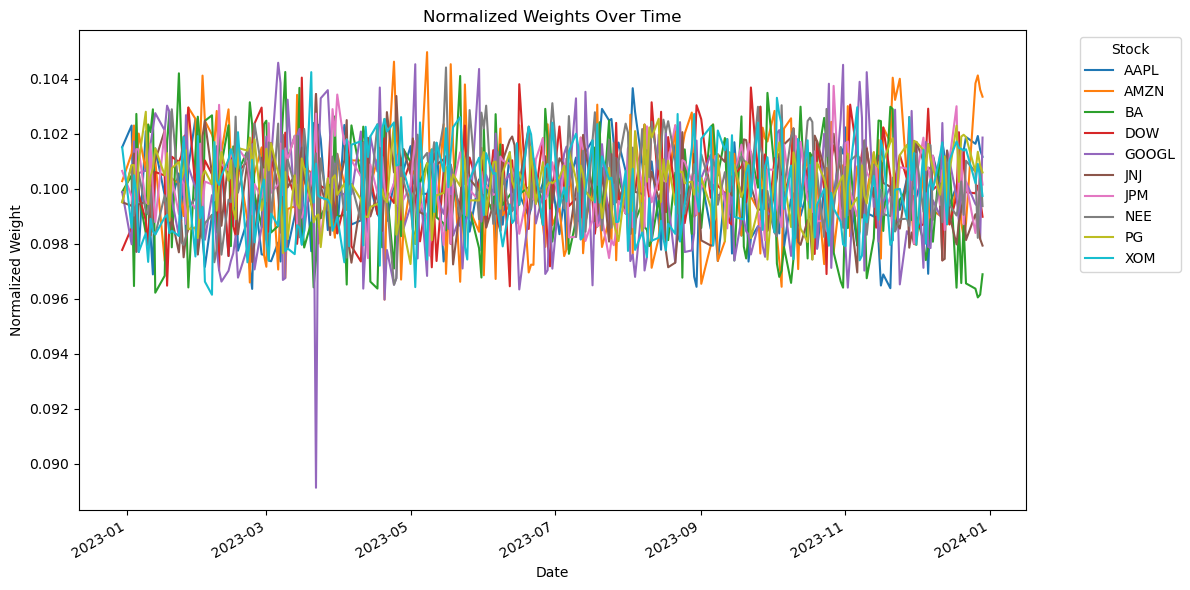

In [25]:
# Normalized weight of the 10 stocks over over the test set.
predicted_weight_rf.plot(kind='line', figsize=(12, 6))
plt.title('Normalized Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Overall return throughout the year: 0.21187649593385038


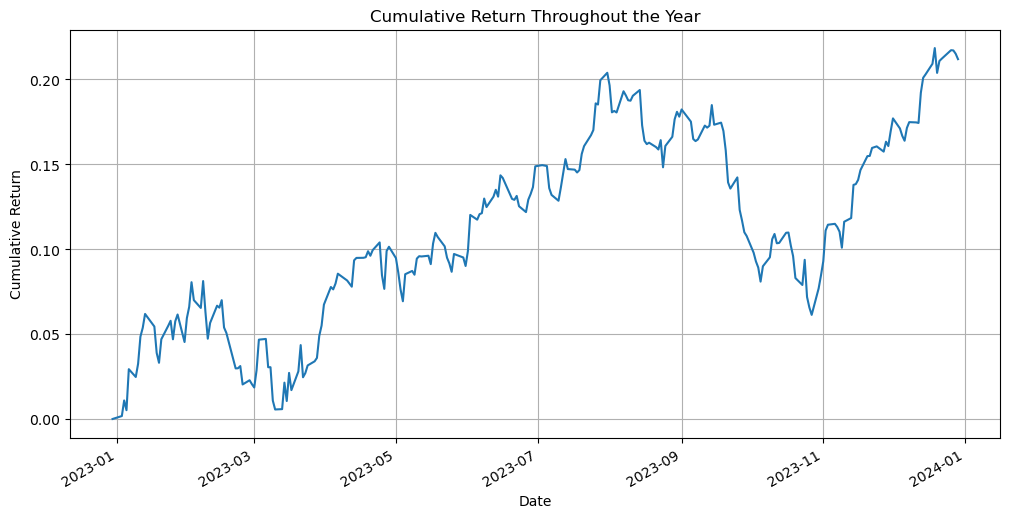

In [26]:
# Normalized weight of the 10 stocks over over the test set.
daily_portfolio_returns_rf = (predicted_weight_rf * actual_daily_returns_rf).sum(axis=1)
cumulative_return_rf = (1 + daily_portfolio_returns_rf).cumprod() - 1
overall_return_rf = cumulative_return_rf.iloc[-1]
print("Overall return throughout the year:", overall_return_rf)

plt.figure(figsize=(12, 6))
cumulative_return_rf.plot()
plt.title('Cumulative Return Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

**Result**

From the result above, we can see we reach a 21% return throughout the 2023. It is a very decent result.

#### Part 2-3 Portfolio Management with Linear Regression and SVM (Vincent)

**Summary**

In part 2-3, we follow the common methodology for part 2, and weuse the Linear Regression and SVR model from part 1 to predict the adjusted close prices of stocks and dynamically adjust portfolio weights based on these predictions. Instead of directly using the predicted prices, we adjust the weights proportionally to the predicted returns to ensure a balanced distribution. For each trading day, the weights are updated dynamically based on the predicted daily returns from the FNN model.


For the model that we train for rebalancing, we have decided to train another Linear regression and a non linear SVR model, such that it now takes the predicted_return (calculated from the predicted adjusted close price) as a feature too, then predict another return (call it predicted_returns_rev). The performance of rebalance model's prediction will be scored based on the weighted return of the portfolio, where the weight is adjusted based on predicted_returns_rev, and use the actual return. These adjusted weights are then used to calculate the portfolio's daily returns and the cumulative returns over the test period. This approach avoids over-investment in the best-performing stock historically and aims for a more balanced and potentially more profitable portfolio performance.

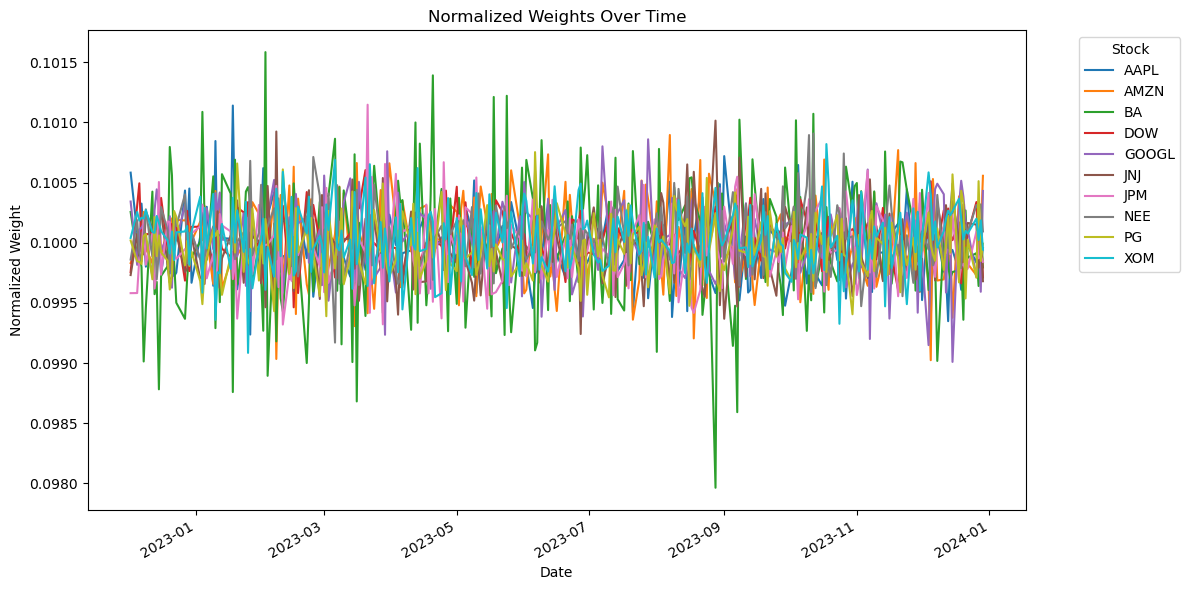

Overall return throughout the year: 0.1706656116280716


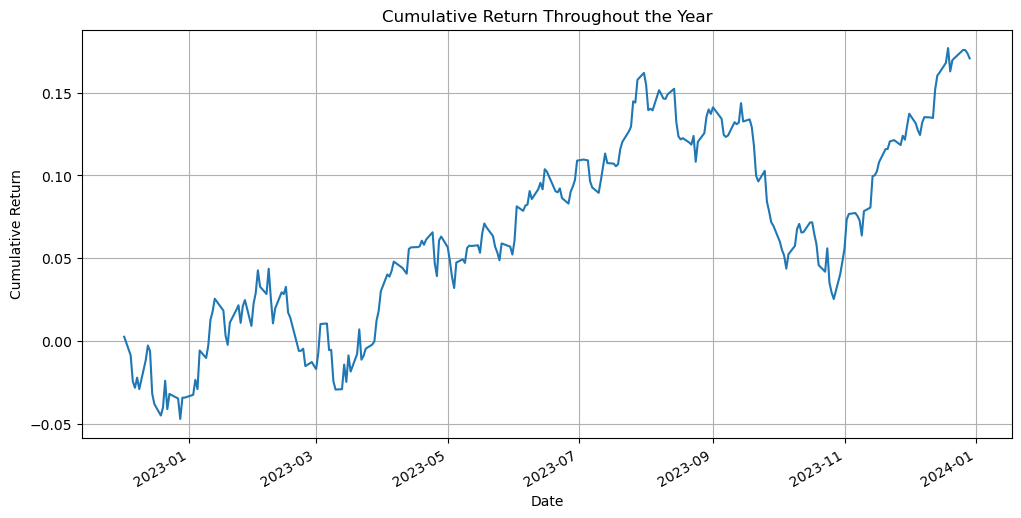

In [28]:
#follow same methodologies for linear regression process
lagged_data_full = create_lagged_features(full_data.copy(), best_k_lr_forecast)
_, X_rebalance_predict_base = scale_features(X_train_lr_best_lag, lagged_data_full[lagged_features_lr_best_lag])
X_rebalance_predictions = final_model_lr_best_lag.predict(X_rebalance_predict_base)

lagged_data_full['Predicted_Adj_Close'] = X_rebalance_predictions
lagged_data_full['Predicted_Return'] = (lagged_data_full['Predicted_Adj_Close'] - lagged_data_full['Adj_Close_lag_1']) / lagged_data_full['Adj_Close_lag_1']


rebalancing_features_lr = lagged_features_lr_best_lag + ['Predicted_Return']

lag_start_date = train_data['Date'].sort_values().unique()[-best_k_lr_forecast]
test_data_extended_lr_pm = (lagged_data_full[lagged_data_full['Date'] >= lag_start_date]).copy()
train_data_lr_pm = (lagged_data_full[lagged_data_full['Date'] < '2023-01-01']).copy()

X_train_rebalance_lr = train_data_lr_pm[rebalancing_features_lr]
X_test_rebalance_lr = test_data_extended_lr_pm[rebalancing_features_lr]


y_train_rebalance_lr = train_data_lr_pm['Daily_Return']
y_test_rebalance_lr = test_data_extended_lr_pm['Daily_Return']

# Define several utility functions to calculate the overall portfolio return and a customized scorer
def calculate_portfolio_return(weights, returns, axis=None):
    return np.sum(weights * returns, axis=axis)

def portfolio_return_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    weights = np.exp(predictions) / np.sum(np.exp(predictions))
    return calculate_portfolio_return(weights, y)

final_model_lr_pm = LinearRegression()
final_model_lr_pm.fit(X_train_rebalance_lr, y_train_rebalance_lr)
# Use the model to predict return and assign weight. Then get data for the daily return if the portfolio is implemented based on the assigned weight.
predicted_returns_lr = final_model_lr_pm.predict(X_test_rebalance_lr)
test_data_extended_lr_pm['Predicted_Returns_rev'] = predicted_returns_lr
predicted_weight_lr = np.exp(predicted_returns_lr) / np.sum(np.exp(predicted_returns_lr), keepdims=True)
test_data_extended_lr_pm['Predicted_Weight'] = predicted_weight_lr
predicted_weight_lr = test_data_extended_lr_pm[['Date', 'Stock', 'Predicted_Weight']].pivot(index='Date', columns='Stock', values='Predicted_Weight')
predicted_weight_lr = predicted_weight_lr.div(predicted_weight_lr.sum(axis=1), axis=0)

actual_daily_returns_lr = test_data_extended_lr_pm.pivot(index='Date', columns='Stock', values='Daily_Return')
actual_weighted_returns_lr = calculate_portfolio_return(predicted_weight_lr.values, actual_daily_returns_lr.values, 1)

predicted_weight_lr.plot(kind='line', figsize=(12, 6))
plt.title('Normalized Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


daily_portfolio_returns_lr = (predicted_weight_lr * actual_daily_returns_lr).sum(axis=1)
cumulative_return_lr = (1 + daily_portfolio_returns_lr).cumprod() - 1
overall_return_lr = cumulative_return_lr.iloc[-1]
print("Overall return throughout the year:", overall_return_lr)

plt.figure(figsize=(12, 6))
cumulative_return_lr.plot()
plt.title('Cumulative Return Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

Linear regression shows strong performance for forecasting data, but it is hard for it to rebalance portfolios as the weights seems to all shuffle around 10% and mixed up during rebalancing. The result return is not too strong which indicates that the regression is hard to pick up the sudtle tweaks of the rebalancing to archieve high returns.

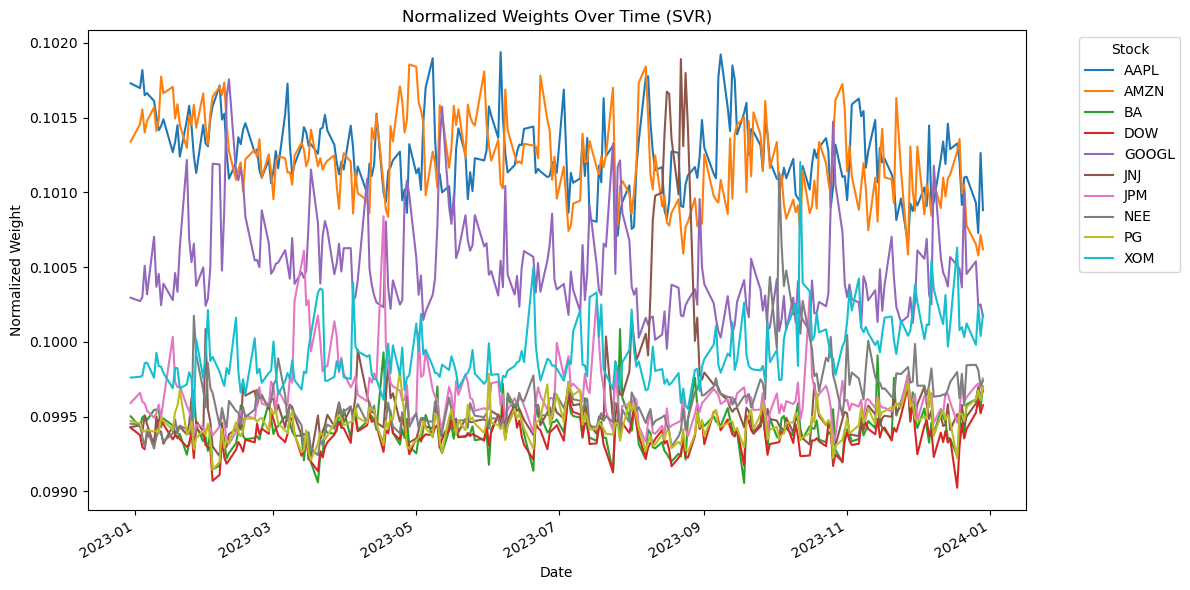

Overall return throughout the year (Linear SVR): 0.21449864779642303


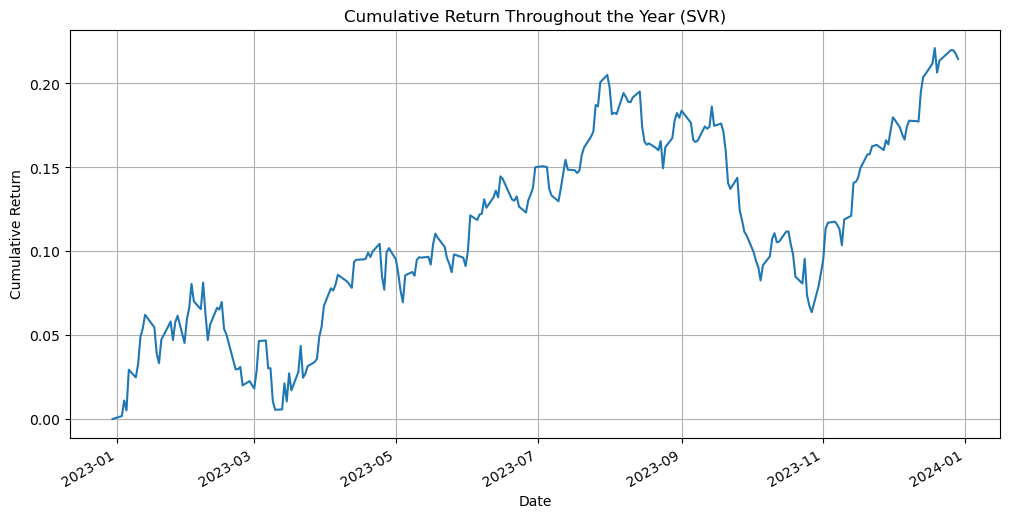

In [29]:
lagged_data_full = create_lagged_features(full_data.copy(), lag)
_, X_rebalance_predict_base = scale_features(X_train, lagged_data_full[features])
X_rebalance_predictions = final_model_linear_svr.predict(X_rebalance_predict_base)

lagged_data_full['Predicted_Adj_Close'] = X_rebalance_predictions
lagged_data_full['Predicted_Return'] = (lagged_data_full['Predicted_Adj_Close'] - lagged_data_full['Adj_Close_lag_1']) / lagged_data_full['Adj_Close_lag_1']

rebalancing_features = features + ['Predicted_Return']

lag_start_date = train_data['Date'].sort_values().unique()[-lag]
test_data_extended_svr_pm = (lagged_data_full[lagged_data_full['Date'] >= lag_start_date]).copy()
train_data_svr_pm = (lagged_data_full[lagged_data_full['Date'] < '2023-01-01']).copy()

X_train_rebalance_svr = train_data_svr_pm[rebalancing_features]
X_test_rebalance_svr = test_data_extended_svr_pm[rebalancing_features]

y_train_rebalance_svr = train_data_svr_pm['Daily_Return']
y_test_rebalance_svr = test_data_extended_svr_pm['Daily_Return']

def calculate_portfolio_return(weights, returns, axis=None):
    return np.sum(weights * returns, axis=axis)

def portfolio_return_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    weights = np.exp(predictions) / np.sum(np.exp(predictions))
    return calculate_portfolio_return(weights, y)

# train the non-linear svr for rebalancing


final_model_nonlinear_svr_pm = SVR(kernel='rbf', max_iter=100000)
final_model_nonlinear_svr_pm.fit(X_train_rebalance_svr, y_train_rebalance_svr)


predicted_returns_svr = final_model_nonlinear_svr_pm.predict(X_test_rebalance_svr)
test_data_extended_svr_pm['Predicted_Returns_rev'] = predicted_returns_svr
predicted_weight_svr = np.exp(predicted_returns_svr) / np.sum(np.exp(predicted_returns_svr), keepdims=True)
test_data_extended_svr_pm['Predicted_Weight'] = predicted_weight_svr
predicted_weight_svr = test_data_extended_svr_pm[['Date', 'Stock', 'Predicted_Weight']].pivot(index='Date', columns='Stock', values='Predicted_Weight')
predicted_weight_svr = predicted_weight_svr.div(predicted_weight_svr.sum(axis=1), axis=0)

actual_daily_returns_svr = test_data_extended_svr_pm.pivot(index='Date', columns='Stock', values='Daily_Return')
actual_weighted_returns_svr = calculate_portfolio_return(predicted_weight_svr.values, actual_daily_returns_svr.values, 1)

predicted_weight_svr.plot(kind='line', figsize=(12, 6))
plt.title('Normalized Weights Over Time (SVR)')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

daily_portfolio_returns_svr = (predicted_weight_svr * actual_daily_returns_svr).sum(axis=1)
cumulative_return_svr = (1 + daily_portfolio_returns_svr).cumprod() - 1
overall_return_svr = cumulative_return_svr.iloc[-1]
print("Overall return throughout the year (Linear SVR):", overall_return_svr)

plt.figure(figsize=(12, 6))
cumulative_return_svr.plot()
plt.title('Cumulative Return Throughout the Year (SVR)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


From the results of the SVR rebalancing model, we can see that the the weights stayed ralatively the same over the years for each categories, which in my opinion is a good thing for portfolio management. It fluctuated slowly 

### Evaluation (Vincent)


#### Part 1 Evaluation

##### Mean Squared Error (MSE)

To evaluate the performance of our models in predicting the adjusted close prices of the stocks, we compared the Mean Squared Error (MSE) for each model.

In [30]:
#part 1 evaluation


mse_scores = {
    'Model': ['FNN', 'Random Forest', 'Linear Regression', 'Linear SVR'],
    'MSE': [mse_fnn, mse_rf_forecast, mse_lr_best_lag, mse_linear_svr]
}

mse_df = pd.DataFrame(mse_scores)
mse_df




Model       MSE
0                FNN  3.504817
1      Random Forest  9.722415
2  Linear Regression  4.334448
3         Linear SVR  4.108125

##### Mean Absolute Error (MAE)

In addition to MSE, we also evaluated the Mean Absolute Error (MAE) for each model.

In [46]:
from sklearn.metrics import mean_absolute_error
mae_fnn = mean_absolute_error(y_test_lagged_fnn, y_pred_fnn)
mae_rf = mean_absolute_error(y_test_rf_forecast, predictions_rf_forecast)
mae_lr = mean_absolute_error(y_test_lr_best_lag, predictions_lr_best_lag)
mae_svr = mean_absolute_error(y_test, predictions_linear_svr)

mae_values = {
    'Model': ['FNN', 'Random Forest', 'Linear Regression', 'Linear SVR'],
    'MAE': [mae_fnn, mae_rf, mae_lr, mae_svr]
}
mae_df = pd.DataFrame(mae_values)

mae_df

Model       MAE
0                FNN  1.595551
1      Random Forest  2.250855
2  Linear Regression  1.430660
3         Linear SVR  1.381018

#### Part 2 Evaluation

##### Benchmark 

We used the S&P 500 as a benchmark to compare the overall returns of our portfolio models.

[*********************100%%**********************]  1 of 1 completed


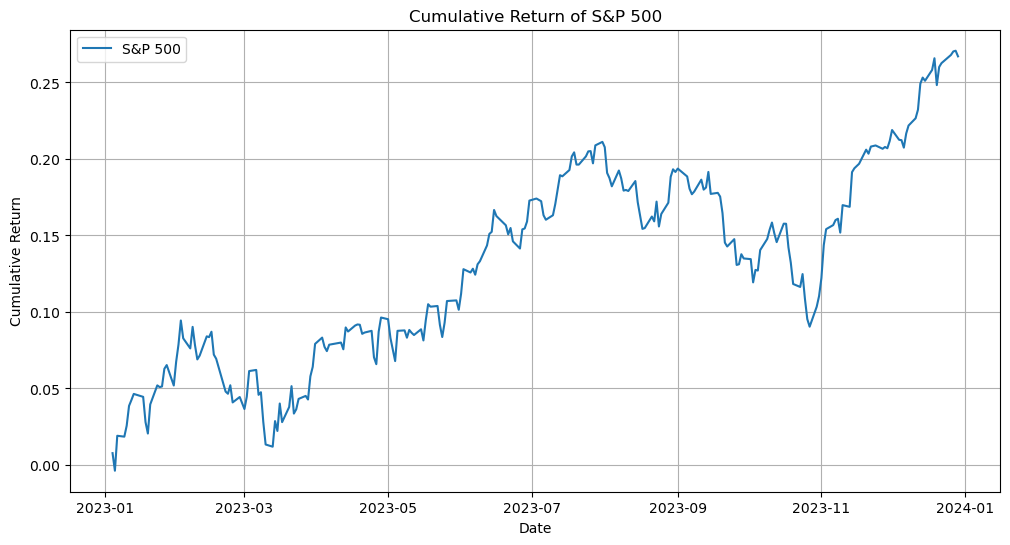

Overall return for S&P 500 throughout the year: 0.2670921014168812


In [32]:
#S&P 500
spy = yf.download('SPY', start='2023-01-01', end='2023-12-31')


spy['Daily_Return'] = spy['Adj Close'].pct_change()
spy['Cumulative_Return'] = (1 + spy['Daily_Return']).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(spy['Cumulative_Return'], label='S&P 500')
plt.title('Cumulative Return of S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

overall_return_spy = spy['Cumulative_Return'].iloc[-1]
print("Overall return for S&P 500 throughout the year:", overall_return_spy)


##### Overall Return Comparison
We compared the overall returns for each model and the S&P 500 benchmark.

In [48]:
#part 2
overall_returns = {
    'Model': ['FNN', 'Random Forest', 'Linear Regression', 'Linear SVR', 'S&P 500'],
    'Overall Return': [overall_return_fnn-1, overall_return_rf, overall_return_lr, overall_return_svr,overall_return_spy]
}

returns_df = pd.DataFrame(overall_returns)
returns_df


Model  Overall Return
0                FNN        0.174954
1      Random Forest        0.211876
2  Linear Regression        0.170666
3         Linear SVR        0.214499
4            S&P 500        0.267092

##### Portfolio Weights Over Time

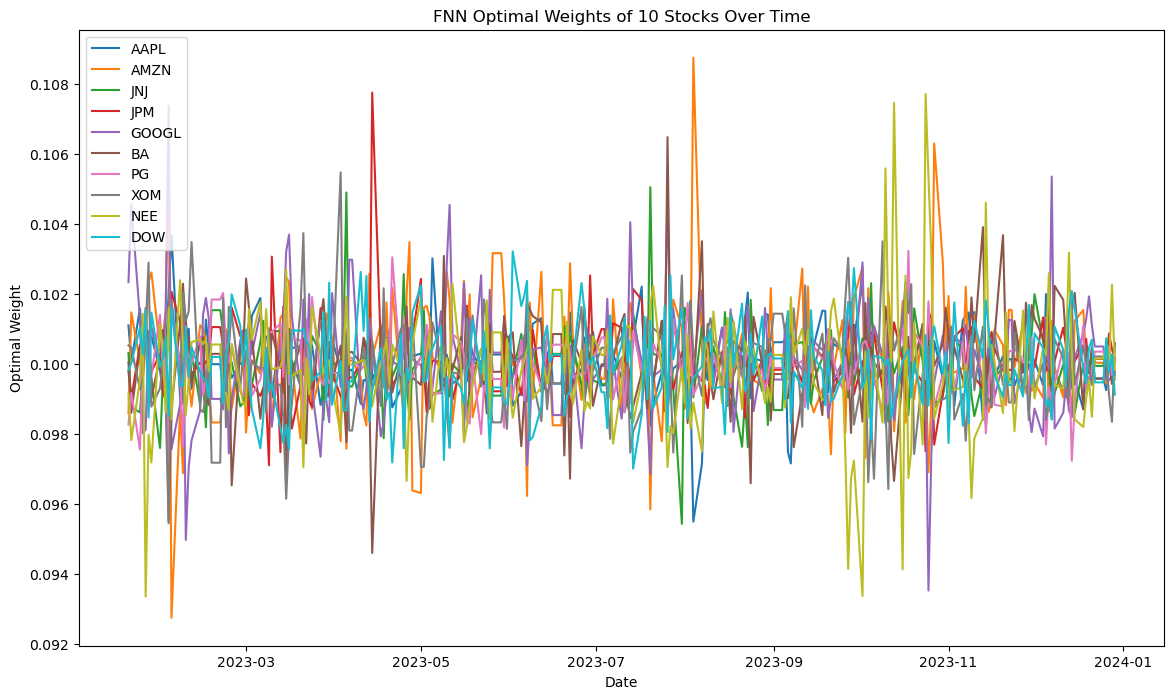

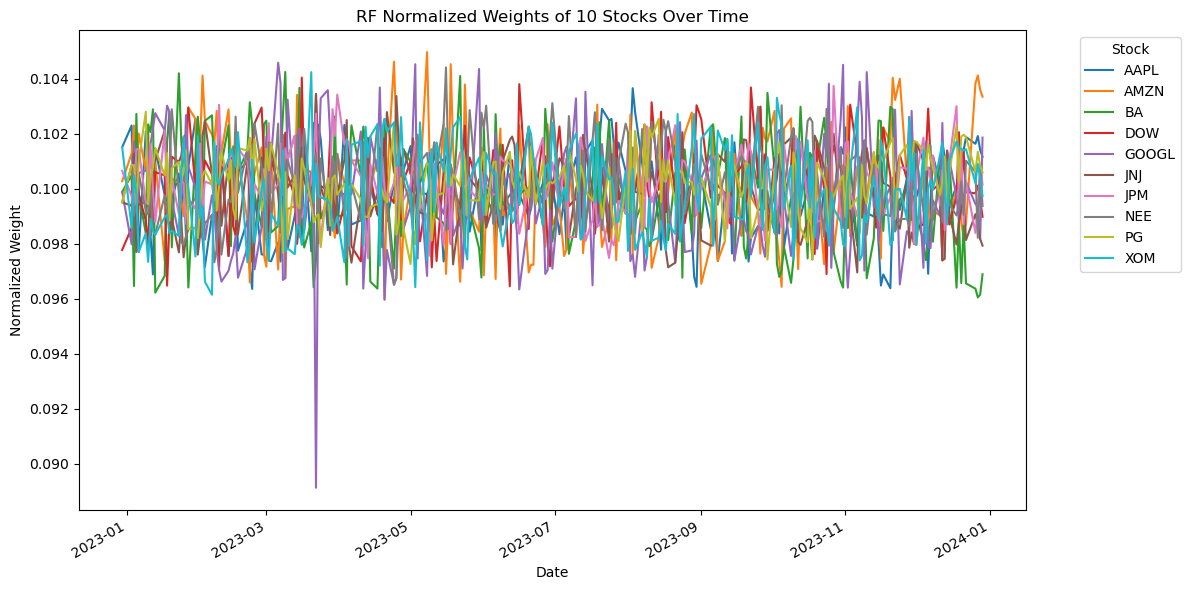

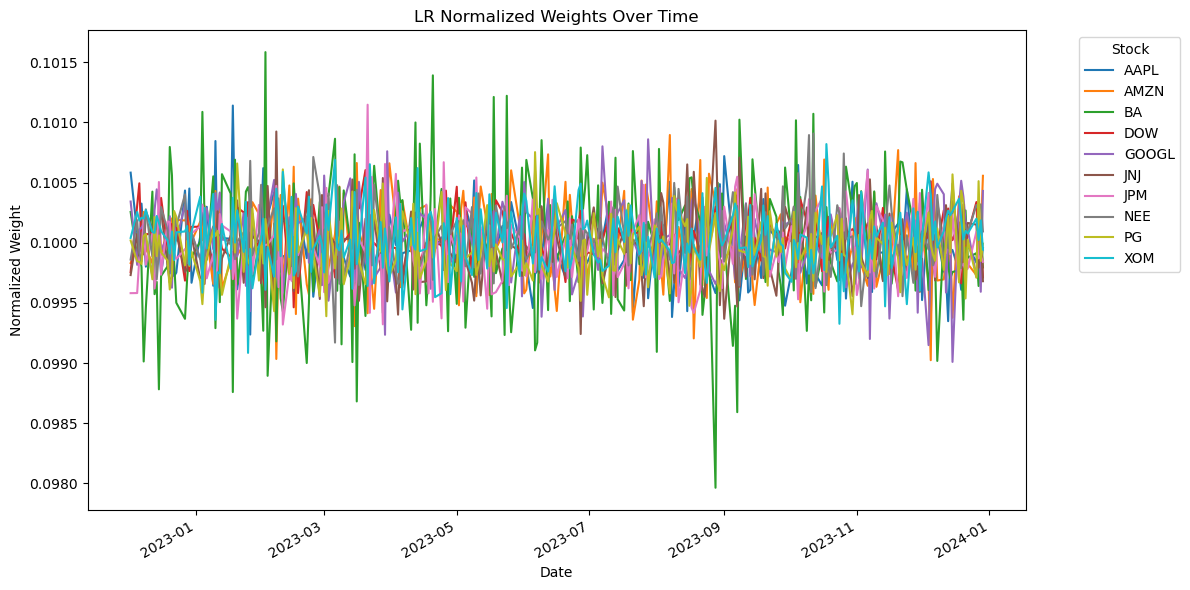

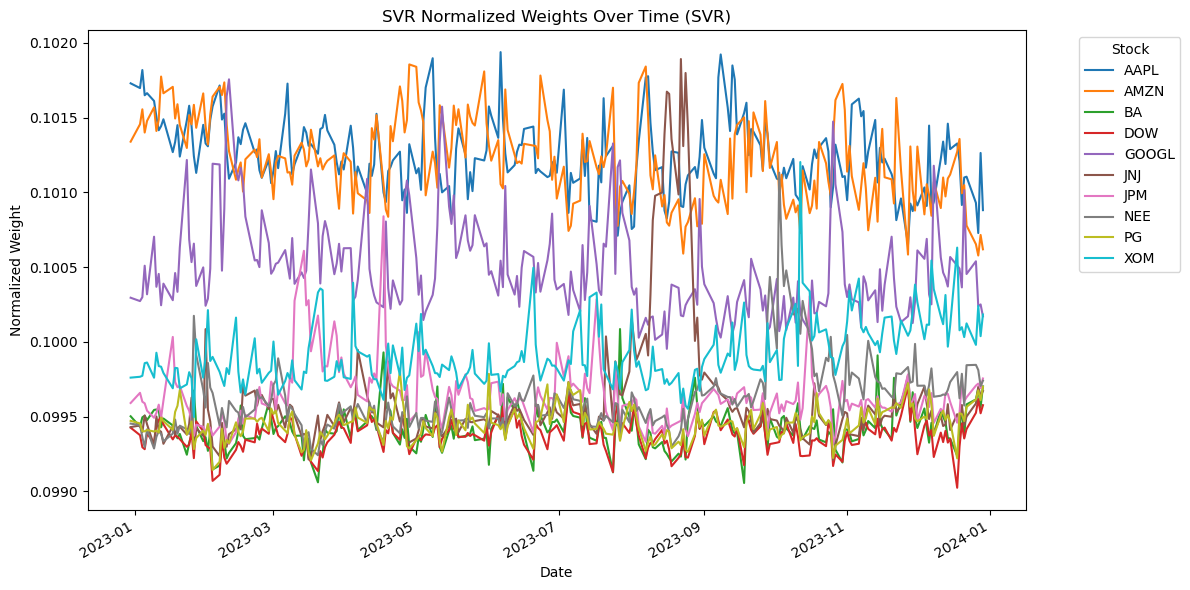

In [34]:
#part 2 rebalancing 
#fnn
plt.figure(figsize=(14, 8))
for stock in stocks:
    plt.plot(dynamic_weights_df_fnn.index, dynamic_weights_df_fnn[stock], label=stock)

plt.xlabel('Date')
plt.ylabel('Optimal Weight')
plt.title('FNN Optimal Weights of 10 Stocks Over Time')
plt.legend(loc='upper left')
plt.show()

predicted_weight_rf.plot(kind='line', figsize=(12, 6))
plt.title('RF Normalized Weights of 10 Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

predicted_weight_lr.plot(kind='line', figsize=(12, 6))
plt.title('LR Normalized Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

predicted_weight_svr.plot(kind='line', figsize=(12, 6))
plt.title('SVR Normalized Weights Over Time (SVR)')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Performance Metrics

##### Sharpe Ratio

In [35]:
def calculate_sharpe_ratio(daily_returns, risk_free_rate=0.01):
    excess_returns = daily_returns - risk_free_rate / 252
    return excess_returns.mean() / excess_returns.std() * np.sqrt(252)

sharpe_fnn = calculate_sharpe_ratio(portfolio_daily_returns_fnn)
sharpe_rf = calculate_sharpe_ratio(daily_portfolio_returns_rf)
sharpe_lr = calculate_sharpe_ratio(daily_portfolio_returns_lr)
sharpe_svr = calculate_sharpe_ratio(daily_portfolio_returns_svr)
sharpe_spy = calculate_sharpe_ratio(spy['Daily_Return'].dropna())

sharpe_values = {
    'Model': ['FNN', 'Random Forest', 'Linear Regression', 'Linear SVR', 'S&P 500'],
    'Sharpe Ratio': [sharpe_fnn, sharpe_rf, sharpe_lr, sharpe_svr, sharpe_spy]
}
sharpe_df = pd.DataFrame(sharpe_values)
sharpe_df

Model  Sharpe Ratio
0                FNN      1.261570
1      Random Forest      1.478747
2  Linear Regression      1.084367
3         Linear SVR      1.493905
4            S&P 500      1.819651

##### Max Drawdown

In [38]:
def calculate_max_drawdown(cumulative_returns):
    cumulative_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / cumulative_max - 1
    max_drawdown = drawdown.min()
    return max_drawdown

max_drawdown_fnn = calculate_max_drawdown(cumulative_returns_fnn)
max_drawdown_rf = calculate_max_drawdown(cumulative_return_rf)
max_drawdown_lr = calculate_max_drawdown(cumulative_return_lr)
max_drawdown_svr = calculate_max_drawdown(cumulative_return_svr)
max_drawdown_spy = calculate_max_drawdown(spy['Cumulative_Return'])

max_drawdown_values = {
    'Model': ['FNN', 'Random Forest', 'Linear Regression', 'Linear SVR', 'S&P 500'],
    'Max Drawdown': [max_drawdown_fnn, max_drawdown_rf, max_drawdown_lr, max_drawdown_svr, max_drawdown_spy]
}
max_drawdown_df = pd.DataFrame(max_drawdown_values)
max_drawdown_df

Model  Max Drawdown
0                FNN     -0.116719
1      Random Forest     -0.930352
2  Linear Regression    -20.274125
3         Linear SVR     -0.932454
4            S&P 500     -1.489810

##### Comparison Summary
We compiled all the performance metrics into a single comparison table.

In [50]:
comparison_data = {
    'Model': ['FNN', 'Random Forest', 'Linear Regression', 'Linear SVR', 'S&P 500'],
    'MSE': [mse_fnn, mse_rf_forecast, mse_lr_best_lag, mse_linear_svr, None],
    'MAE': [mae_fnn, mae_rf, mae_lr, mae_svr, None],
    'Sharpe Ratio': [sharpe_fnn, sharpe_rf, sharpe_lr, sharpe_svr, sharpe_spy],
    'Max Drawdown': [max_drawdown_fnn, max_drawdown_rf, max_drawdown_lr, max_drawdown_svr, max_drawdown_spy],
    'Overall Return': [overall_return_fnn-1, overall_return_rf, overall_return_lr, overall_return_svr, overall_return_spy]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df


Model       MSE       MAE  Sharpe Ratio  Max Drawdown  \
0                FNN  3.504817  1.595551      1.261570     -0.116719   
1      Random Forest  9.722415  2.250855      1.478747     -0.930352   
2  Linear Regression  4.334448  1.430660      1.084367    -20.274125   
3         Linear SVR  4.108125  1.381018      1.493905     -0.932454   
4            S&P 500       NaN       NaN      1.819651     -1.489810   

   Overall Return  
0        0.174954  
1        0.211876  
2        0.170666  
3        0.214499  
4        0.267092

### Conclusion (Vincent)

### Individual Model Assessments

#### FNN Model Assessment

- **Performance:** 

    The results of the hyperparameter tuning and training process reveal a well-optimized Feedforward Neural Network (FNN) model for stock price forecasting. With the optimal configuration of three layers and units per layer of [480, 192, 192], coupled with dropout rates of [0.2, 0.0, 0.2] and a learning rate of 0.0033, the model demonstrates strong learning capabilities. The final validation loss and Mean Squared Error (MSE) on the test data indicate that the model performs well on unseen data. These results suggest that the FNN model can serve as a reliable tool for stock price prediction, providing valuable insights for dynamic portfolio optimization. We can also see from the plots that the predicted curves present the similar trend as the actual data. However, further modeling with different models are testing to find the best model for predictions.
    The results of the dynamic portfolio optimization and cumulative returns analysis indicate a high level of variability in the optimal weights assigned to the 10 stocks over the year 2023. The first plot shows the optimal weights fluctuating significantly, reflecting the dynamic nature of the strategy as it adapts to forecasted returns. The cumulative returns exceed 1.15 by the end of the year, indicating a 15% gain. This performance highlights the potential of using machine learning models for adaptive portfolio management, though further analysis and validation are necessary to ensure robustness and generalizability.

- **Risks:**

   The second plot, depicting the cumulative returns of the dynamic portfolio, presents a generally positive trajectory over the test period. Despite some periods of volatility and drawdowns, the overall trend is upward, suggesting that the dynamic weighting approach outperforms a static strategy. This variability suggests that the model is responsive to changing market conditions, though the high frequency of fluctuations may also indicate potential overfitting or sensitivity to short-term noise.
    From the performance, The FNN model shows a relatively low MSE and a decent Sharpe Ratio, which means good predictive performance and risk-adjusted returns. However, the model has a higher MAE compared to the Linear Regression and Linear SVR models, suggesting larger errors in individual predictions. The max drawdown is the lowest among the models, which indicates that the FNN model was able to limit the worst-case losses better than others. Overall the performance of FNN model is really good and is a safe bet for this strategy.
---

#### Random Forest Model Assessment

- **Performance:** 


    The k selection choose 1 from 1-20 which shows that the random forest algorithem prefers less data and it could be due to not enought selection for randomsearch or just overall too many possible outcomes from the random forest. The parameter choices from the lag 1 is also expected and optimal for the random forest model. The MSE was low enough the the plots shown that the prices somewhat stick to the test data. 
    For the second model, the rebalancing plots seems normal and makes sense but the fluctuations might be too great, but it still produced great returns. This shows that random forest model might be good for allocation and rebalancing but not as good as other models for predicting the returns/forecast.
    
    
    
- **Risks:**

    The Random Forest model has the highest MSE and MAE among all models, which shows it has less accuracy in its predictions. However, despite its loss in the first part, it achieves a higher Sharpe Ratio than the FNN and Linear Regression models, suggesting good risk-adjusted returns. The max drawdown is still significantly higher for the tradeoff of the return, indicating greater exposure to worst-case losses.


---

#### Linear Regression Model Assessment

- **Performance:** 

    For the simiplist baseline model, Linear regression is expected to perform well for forecast in part 1. The training model picks lag 20 for the best lag which makes sense since generally more time series data is good for linear regression. The results of the test set is really, possibily the best out of all models which is logical since MSE will be shortest for linear regression generally speaking. 
    For the second part, its performance is not that great. The allocation graph and returns are all normal but the returns and max draw down too high. After investingation, its cause is probably overfitting with high k value since using other models for rebalancing results in the same output which is also low return. This shows that linear regression might not be suited for this strategy. 

- **Risks:**

    The Linear Regression model shows a reasonable MSE and the lowest MAE in the first part this shows it is great at predicting but its second part performance is not good. The Sharpe Ratio is the lowest among all models, suggesting less favorable risk-adjusted returns. The max drawdown is extremely high, indicating significant risks.


---

#### Linear SVR Model Assessment

- **Performance:** 

    For the first part of the project SVR already have good prediciton from the low MSE since it is a linear model for regression which make sense. The fact that it is better than Linear regression was surprising. 
    For the second part, Linear SVR is the only model that showed good rebalancing weights graph, the weights follows noticable trend and is tracable for the reason they are allocated which is really good. Its performance is also top-notch, beating other models and top the returns and sharpe ratio with the drawback on risks. Ideally, this model is really good this strategy of portfolio management. Its possibilities to parameterize and train on data makes it a great machine learning strategy, and its linear relationships handles predicitons and rebalancing really well. 

- **Risks:**

    The Linear SVR model has a good balance between low MSE and MAE, which means its predictive power is good.It achieves the highest Sharpe Ratio and returns among all models, indicating the best risk-adjusted returns.The max drawdown is high, similar to the Random Forest model, which is a drawback from the high returns.
     
     
     


---

### Overall Comparison and Insights

- **Performance Comparison:**

Overall, the performance of the models didn't beat the S&P 500 returns(0.267092) and sharpe ratio, but all the models have lower Sharpe ratio than S&P 500 besides linear regression. One of the model that is very close to that is the SVR model where the sharpe ratio is 1.49 which is highest amongest the models. For the return, SVR also has the highest overall return among the models (0.215) which serves our purpose in the original goal for this project. For the worst model, it will be linear regression with highest max drawdown and lowest return. 

  
- **Risk Analysis:**

In the risk side of the things, FNN model has low drawdowm and a balanced performance which make it the safest option, while Random forest and SVR has better returns but with much higher maximum drawdown. 


- **Model Selection:**

The best model according to return purely from our initial goal is the SVR. From its performance metrics and summary, its  sharpe ratio is high and the distribution is more understandable with somewhat understandale model anaylsis rather the black box of FNN and Random Forest. 

For the most risk-averse model we would choose FNN since its low drawdown and still good performance.

  
- **Future Work:**

Since in this project focuses on separate model implementation, it is hard to see some combinations of different models. In reality, it might be benefitial to have linear regression do the forecast while the LVR do the model rebalancing(which is actually done below, I didn't include it since the performance is not good). We could also investigate other machine learning models like reinforced learning which is a popular choice from the literatures. We could also incorporate more features and extend the assets and time periods. 


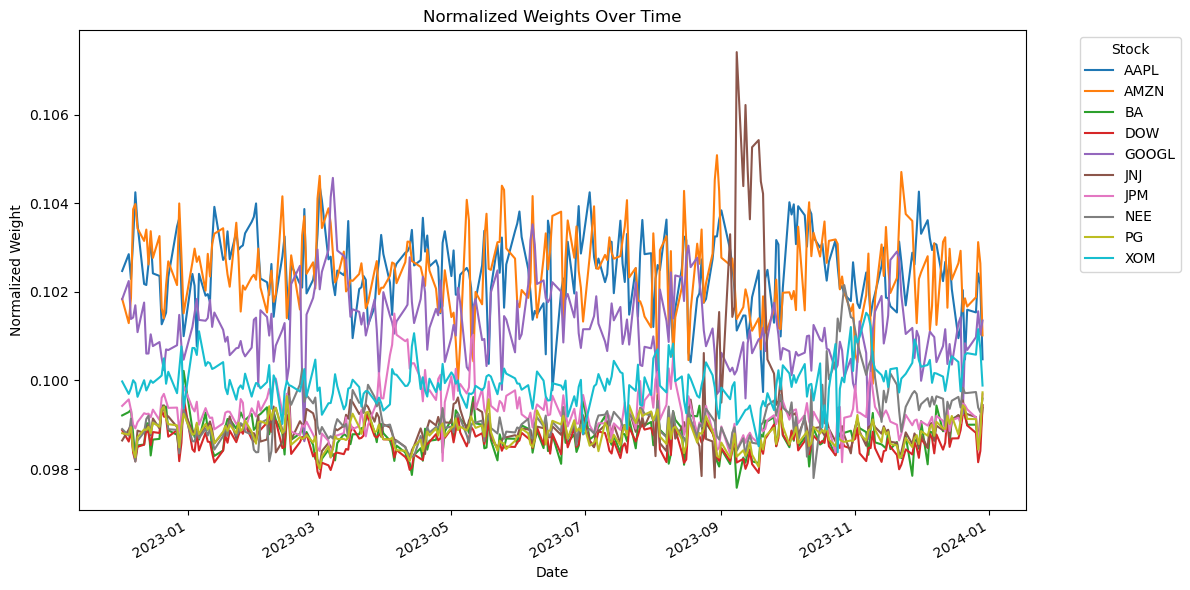

Overall return throughout the year: 0.1733983247998585


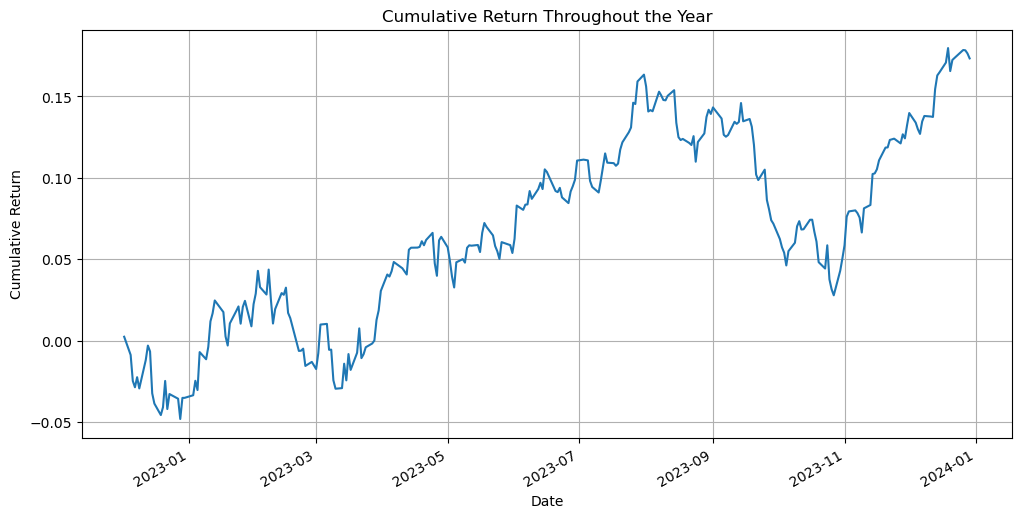

In [51]:
#follow same methodologies for linear regression process
lagged_data_full = create_lagged_features(full_data.copy(), best_k_lr_forecast)
_, X_rebalance_predict_base = scale_features(X_train_lr_best_lag, lagged_data_full[lagged_features_lr_best_lag])
X_rebalance_predictions = final_model_lr_best_lag.predict(X_rebalance_predict_base)

lagged_data_full['Predicted_Adj_Close'] = X_rebalance_predictions
lagged_data_full['Predicted_Return'] = (lagged_data_full['Predicted_Adj_Close'] - lagged_data_full['Adj_Close_lag_1']) / lagged_data_full['Adj_Close_lag_1']


rebalancing_features_lr = lagged_features_lr_best_lag + ['Predicted_Return']

lag_start_date = train_data['Date'].sort_values().unique()[-best_k_lr_forecast]
test_data_extended_lr_pm = (lagged_data_full[lagged_data_full['Date'] >= lag_start_date]).copy()
train_data_lr_pm = (lagged_data_full[lagged_data_full['Date'] < '2023-01-01']).copy()

X_train_rebalance_lr = train_data_lr_pm[rebalancing_features_lr]
X_test_rebalance_lr = test_data_extended_lr_pm[rebalancing_features_lr]


y_train_rebalance_lr = train_data_lr_pm['Daily_Return']
y_test_rebalance_lr = test_data_extended_lr_pm['Daily_Return']

# Define several utility functions to calculate the overall portfolio return and a customized scorer
def calculate_portfolio_return(weights, returns, axis=None):
    return np.sum(weights * returns, axis=axis)

def portfolio_return_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    weights = np.exp(predictions) / np.sum(np.exp(predictions))
    return calculate_portfolio_return(weights, y)


final_model_nonlinear_svr_pm = SVR(kernel='rbf', max_iter=100000)
final_model_nonlinear_svr_pm.fit(X_train_rebalance_lr, y_train_rebalance_lr)


predicted_returns_lr = final_model_nonlinear_svr_pm.predict(X_test_rebalance_lr)
test_data_extended_lr_pm['Predicted_Returns_rev'] = predicted_returns_lr
predicted_weight_lr = np.exp(predicted_returns_lr) / np.sum(np.exp(predicted_returns_lr), keepdims=True)
test_data_extended_lr_pm['Predicted_Weight'] = predicted_weight_lr
predicted_weight_lr = test_data_extended_lr_pm[['Date', 'Stock', 'Predicted_Weight']].pivot(index='Date', columns='Stock', values='Predicted_Weight')
predicted_weight_lr = predicted_weight_lr.div(predicted_weight_lr.sum(axis=1), axis=0)

actual_daily_returns_lr = test_data_extended_lr_pm.pivot(index='Date', columns='Stock', values='Daily_Return')
actual_weighted_returns_lr = calculate_portfolio_return(predicted_weight_lr.values, actual_daily_returns_lr.values, 1)

predicted_weight_lr.plot(kind='line', figsize=(12, 6))
plt.title('Normalized Weights Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


daily_portfolio_returns_lr = (predicted_weight_lr * actual_daily_returns_lr).sum(axis=1)
cumulative_return_lr = (1 + daily_portfolio_returns_lr).cumprod() - 1
overall_return_lr = cumulative_return_lr.iloc[-1]
print("Overall return throughout the year:", overall_return_lr)

plt.figure(figsize=(12, 6))
cumulative_return_lr.plot()
plt.title('Cumulative Return Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()